
<left>
<img src="images/main.webp" width=1000 />
</left>
<br />






# Synopsis

In this classic Rudyard Kipling's book, Mowgli, an abandoned child raised by wolves, has his peaceful existence threatened by the return of the man-eating tiger Shere Khan (George Sanders). Facing certain death, Mowgli must overcome his reluctance to leave his wolf family and return to the "man village." But he is not alone on his quest: Aided by Bagheera the panther, and later by the carefree bear Balloo (Phil Harris), he braves the jungle's many perils.

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

In [3]:
import nltk
#nltk.download('vader_lexicon')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('movie_reviews')

#### Lets find the most common words in our book 

In [4]:
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file = open('JungleBook.txt', encoding = 'utf8' )
# stopwords = set(line.strip() for line in open('stopwords'))
wordcount = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
#     if word not in stopwords:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1

d = collections.Counter(wordcount)
for word, count in d.most_common(10):
    print(word , ":", count)

the : 1642
and : 950
of : 534
to : 522
he : 498
a : 483
in : 311
that : 311
i : 303
his : 281


#### Many of them are the stop words

# Lets filter out the stop word and show word cloud diagram :

In [5]:
wordcl = open ('JungleBook.txt').read()
wordc2=wordcl.replace('said','')
wordc3=wordc2.replace('one','')
wordc4=wordc3.replace('will','')

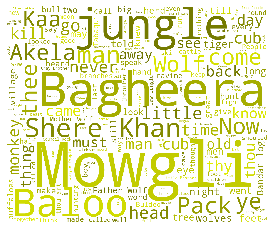

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

file_content=wordc4

wordcloud = WordCloud(
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Most common words : Mowgli,Bagheera,Baloo and jungle

<left>
<img src="images/maincharcters.png" width=1000 />
</left>

# Text Analysis using TextBlob

In [7]:

file = open("JungleBook.txt")
file=file.read()

cB = TextBlob(file)

### POS Tagging

POS tagging is the process of marking up a word in a corpus to a corresponding part of a speech tag, based on its context and definition. This task is not straightforward, as a particular word may have a different part of speech based on the context in which the word is used.

In [8]:
#nltk.download('averaged_perceptron_tagger')
#POS tagging
cB.tags

[('[', 'JJ'),
 ('Illustration', 'NNP'),
 (']', 'NNP'),
 ('MOWGLI', 'NNP'),
 ("'S", 'POS'),
 ('BROTHERS', 'NNPS'),
 ('IT', 'NNP'),
 ('was', 'VBD'),
 ('seven', 'CD'),
 ("o'clock", 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('warm', 'JJ'),
 ('evening', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('Seeonee', 'NNP'),
 ('hills', 'NNS'),
 ('when', 'WRB'),
 ('Father', 'NNP'),
 ('Wolf', 'NNP'),
 ('woke', 'VBD'),
 ('up', 'RP'),
 ('from', 'IN'),
 ('his', 'PRP$'),
 ('day', 'NN'),
 ("'s", 'POS'),
 ('rest', 'NN'),
 ('scratched', 'VBD'),
 ('himself', 'PRP'),
 ('yawned', 'VBN'),
 ('and', 'CC'),
 ('spread', 'VBD'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('paws', 'NN'),
 ('one', 'CD'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('rid', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('sleepy', 'NN'),
 ('feeling', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('tips', 'NNS'),
 ('Mother', 'NNP'),
 ('Wolf', 'NNP'),
 ('lay', 'NN'),
 ('with', 'IN'),
 ('her', 'PRP$'),
 ('big', 'JJ')

### Noun_Phase extraction

Noun Phrase Extraction. Noun phrases are part of speech patterns that include a noun. They can include whatever other parts of speech make sense, and can include multiple nouns.

In [9]:
cB.noun_phrases

WordList(['illustration', 'mowgli', 'brothers it', 'warm evening', 'seeonee', 'father wolf', "day 's rest", 'sleepy feeling', 'wolf', 'big gray nose', 'moon shone', 'augrh', 'father wolf', 'bushy tail', 'good luck', 'o chief', 'wolves', 'good luck', 'strong white teeth', 'noble children', 'illustration', 'luck go with you', 'chief of the wolves', 'tabaqui', 'dish-licker', 'india', 'tabaqui', 'village rubbish-heaps', 'tabaqui', 'tabaqui', 'disgraceful thing', 'wild creature', 'enter', 'father wolf', 'tabaqui', 'dry bone', 'good feast', 'who', 'gidur-log', 'jackal', 'people ]', 'good meal', 'noble children', 'tabaqui', 'compliment children', 'father wolf', 'tabaqui', 'shere khan', 'shere khan', 'waingunga', 'father wolf', 'jungle', 'fair warning', 'lungri', 'lame', 'wolf', 'waingunga', '_our_ villagers', 'shere khan', 'shall', 'tabaqui', 'father wolf', 'thy master', 'thou', 'tabaqui', 'ye', 'shere khan', 'father wolf', 'dark valley', 'singsong whine', 'father wolf', "night 's work", 'doe

### Tokenization 

One common task in NLP (Natural Language Processing) is tokenization. "Tokens" are usually individual words (at least in languages like English) and "tokenization" is taking a text or set of text and breaking it up into its individual words

In [10]:
cB.words

WordList(['Illustration', 'MOWGLI', "'S", 'BROTHERS', 'IT', 'was', 'seven', "o'clock", 'of', 'a', 'very', 'warm', 'evening', 'in', 'the', 'Seeonee', 'hills', 'when', 'Father', 'Wolf', 'woke', 'up', 'from', 'his', 'day', "'s", 'rest', 'scratched', 'himself', 'yawned', 'and', 'spread', 'out', 'his', 'paws', 'one', 'after', 'the', 'other', 'to', 'get', 'rid', 'of', 'the', 'sleepy', 'feeling', 'in', 'the', 'tips', 'Mother', 'Wolf', 'lay', 'with', 'her', 'big', 'gray', 'nose', 'dropped', 'across', 'her', 'four', 'tumbling', 'squealing', 'cubs', 'and', 'the', 'moon', 'shone', 'into', 'the', 'mouth', 'of', 'the', 'cave', 'where', 'they', 'all', 'lived', 'Augrh', 'said', 'Father', 'Wolf', 'it', 'is', 'time', 'to', 'hunt', 'again', 'and', 'he', 'was', 'going', 'to', 'spring', 'downhill', 'when', 'a', 'little', 'shadow', 'with', 'a', 'bushy', 'tail', 'crossed', 'the', 'threshold', 'and', 'whined', 'Good', 'luck', 'go', 'with', 'you', 'O', 'Chief', 'of', 'the', 'Wolves', 'and', 'good', 'luck', 'a

Sentences in textblob

In [11]:
cB.sentences[100]

Sentence("A man's cub went this way," said Shere Khan.")

### converting to lowercase :

In [12]:
cB.lower()

TextBlob("                             [illustration]

                           mowgli's brothers


it was seven o'clock of a very warm evening in the seeonee hills when
father wolf woke up from his day's rest, scratched himself, yawned, and
spread out his paws one after the other to get rid of the sleepy feeling
in the tips. mother wolf lay with her big gray nose dropped across her
four tumbling, squealing cubs, and the moon shone into the mouth of the
cave where they all lived. "augrh!" said father wolf, "it is time to
hunt again"; and he was going to spring downhill when a little shadow
with a bushy tail crossed the threshold and whined: "good luck go with
you, o chief of the wolves; and good luck and strong white teeth go with
the noble children, that they may never forget the hungry in this
world."

   [illustration: "'good luck go with you, o chief of the wolves.'"]

it was the jackal--tabaqui, the dish-licker--and the wolves of india
despise tabaqui because he runs about makin

### Translation and language detection

In [13]:
print(cB.sentences[15].detect_language())
cB.sentences[15]

en


Sentence("How large are their eyes!")

In [14]:
cB.sentences[15].translate(to='hi') # transating to hindi

Sentence("उनकी आँखें कितनी बड़ी हैं!")

### Stemming and Lemmatization


Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, 

In [15]:
# Initialize stemmer.
stemmer = SnowballStemmer('english')

# Stem each word.
stemmed1 = [stemmer.stem(word) for word in cB.words]
print(len(stemmed1))
print(stemmed1)

24080
['illustr', 'mowg', "'s", 'brother', 'it', 'was', 'seven', "o'clock", 'of', 'a', 'veri', 'warm', 'even', 'in', 'the', 'seeone', 'hill', 'when', 'father', 'wolf', 'woke', 'up', 'from', 'his', 'day', "'s", 'rest', 'scratch', 'himself', 'yawn', 'and', 'spread', 'out', 'his', 'paw', 'one', 'after', 'the', 'other', 'to', 'get', 'rid', 'of', 'the', 'sleepi', 'feel', 'in', 'the', 'tip', 'mother', 'wolf', 'lay', 'with', 'her', 'big', 'gray', 'nose', 'drop', 'across', 'her', 'four', 'tumbl', 'squeal', 'cub', 'and', 'the', 'moon', 'shone', 'into', 'the', 'mouth', 'of', 'the', 'cave', 'where', 'they', 'all', 'live', 'augrh', 'said', 'father', 'wolf', 'it', 'is', 'time', 'to', 'hunt', 'again', 'and', 'he', 'was', 'go', 'to', 'spring', 'downhil', 'when', 'a', 'littl', 'shadow', 'with', 'a', 'bushi', 'tail', 'cross', 'the', 'threshold', 'and', 'whine', 'good', 'luck', 'go', 'with', 'you', 'o', 'chief', 'of', 'the', 'wolv', 'and', 'good', 'luck', 'and', 'strong', 'white', 'teeth', 'go', 'with',

In [16]:
# Assume every word is a noun
lemmatized1 = [word.lemmatize() for word in cB.words]
print(len(lemmatized1))


24080


# Part 2: Analysis of Sentences

In [17]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

with open('JungleBook.txt', 'r', errors='ignore') as file1:
    data = file1.read().replace('\n', '')

text= TextBlob(data)
my_list=text.tags

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [18]:
sentiment=[]
x=0

for sentence in text:
    text.sentiment

for sentence in text.sentences:
    sentiment.append(sentence.sentiment)
    
sentence_df = pd.DataFrame(sentiment)
sentence_df.describe()

polarity  subjectivity
count  1409.000000   1409.000000
mean      0.033243      0.248691
std       0.235460      0.303374
min      -1.000000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.000000
75%       0.000000      0.500000
max       1.000000      1.000000

Above we may see a brief stats of book done with use of Pandas pandas.DataFrame.describe() function. I will swiftly point out most important elements of it below.

Book contains 1409 sentences in total. All sentences has been marked with polarity score ranging from -1.0 to +1.0 and subjectivity score ranging from 0.0 to 1.0. Polarity score mean of +0.033 is considered a rather neutral. Subjectivity score mean of +0.248 is slightly subjective.

## Example of highly subjectified sentence

In [19]:
text.sentences[28]

Sentence("Now the villagers of the Waingunga areangry with him, and he has come here to make _our_ villagers angry.They will scour the jungle for him when he is far away, and we and ourchildren must run when the grass is set alight.")

# Polarity

## Example of high polarity

In [20]:
text.sentences[1369] 


Sentence("We will not wake him, for        his strength is very great.")

## Example of low polarity

In [21]:
text.sentences[647] 

Sentence("He is not of our tribe, being footless and withmost evil eyes," said Bagheera.")

<Figure size 720x720 with 0 Axes>

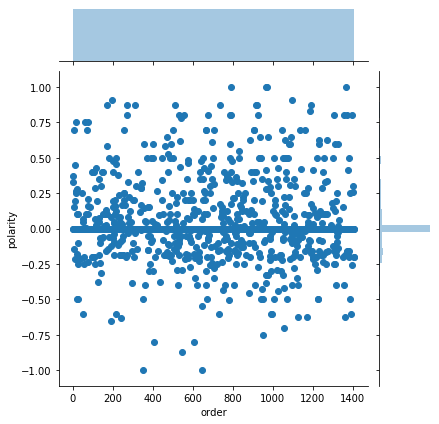

In [22]:
sentence_df['order'] = sentence_df.index
sentence_df = pd.DataFrame(sentiment)
sentence_df['order'] = sentence_df.index
polarity = pd.Series(sentence_df["polarity"])
plt.figure(figsize=(10, 10))
sns.jointplot("order", "polarity", data=sentence_df, kind="scatter")

Lets remove the neutral values to perform deeper analysis of non-neutral sentences.

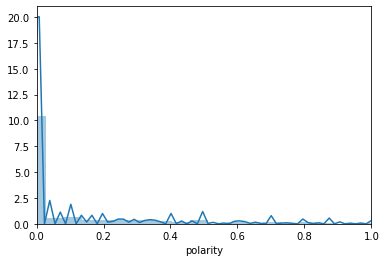

In [23]:
plt.xlim(0, None)
sns.distplot(polarity)

<Figure size 1080x360 with 0 Axes>

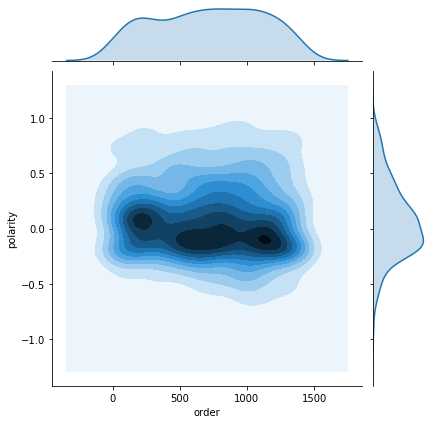

In [24]:
plt.figure(figsize=(15, 5))
sns.jointplot("order", "polarity", data=sentence_df[sentence_df.polarity != 0], kind="kde")

At y-axis histogram we can see a right skewed histogram of polarity with a broader left-tail. The two clusters of +0.1  and -0.1 sentences at around sentences 100 and 1150 are visible clusters. 


In [25]:
text.sentences[1125:1250]

[Sentence("Eaten and drunk too, and hethinks that I shall wait till he has slept!"),
 Sentence("Now, where does he lie up?If there were but ten of us we might pull him down as he lies."),
 Sentence("Thesebuffaloes will not charge unless they wind him, and I cannot speak theirlanguage."),
 Sentence("Can we get behind his track so that they may smell it?"),
 Sentence("""He swam far down the Waingunga to cut that off," said Gray Brother."),
 Sentence(""Tabaqui told him that, I know."),
 Sentence("He would never have thought of italone.""),
 Sentence("Mowgli stood with his finger in his mouth, thinking."),
 Sentence(""The bigravine of the Waingunga."),
 Sentence("That opens out on the plain not half a milefrom here."),
 Sentence("I can take the herd round through the jungle to the head ofthe ravine and then sweep down--but he would slink out at the foot."),
 Sentence("Wemust block that end."),
 Sentence("Gray Brother, canst thou cut the herd in two forme?"),
 Sentence("""Not I, perhaps--bu

I have checked where exactly this  -0.1 spike has appeared: it was when mowgli goes into village and lays trap for sherekhan.

In [26]:
text.sentences[200:300]

[Sentence(""Take him away," he said to Father Wolf, "and train him as befits one ofthe Free People."),
 Sentence(""And that is how Mowgli was entered into the Seeonee wolf-pack for theprice of a bull and on Baloo's good word.Now you must be content to skip ten or eleven whole years, and onlyguess at all the wonderful life that Mowgli led among the wolves,because if it were written out it would fill ever so many books."),
 Sentence("He grewup with the cubs, though they of course were grown wolves almost beforehe was a child, and Father Wolf taught him his business, and the meaningof things in the jungle, till every rustle in the grass, every breath ofthe warm night air, every note of the owls above his head, every scratchof a bat's claws as it roosted for a while in a tree, and every splashof every little fish jumping in a pool, meant just as much to him as thework of his office means to a business man."),
 Sentence("When he was not learning hesat out in the sun and slept, and ate, and 

Baloo the bear and Bagheera the black panther teach Mowgli the Law of the Jungle, while Shere Khan turns the pack against the boy. When the old wolf Akela must step down as a leader, the pack throws Mowgli out, and Shere Khan demands they turn Mowgli over to him. Mowgli uses the "red flower," fire, to keep the wolves and Shere Khan at bay, saving Akela's life and promising he will return with Shere Khan's skin on his head. 

<left>
<img src="images/mowglileaving.jpeg" width=500 />
</left>

## Subjectivity

## Example of high subjectivity

In [27]:
text.sentences[351] 

Sentence("He has troubled the jungle for tenseasons.")

In [28]:
text.sentences[33] 

Sentence(""Out, and hunt with thy master.")

<Figure size 720x720 with 0 Axes>

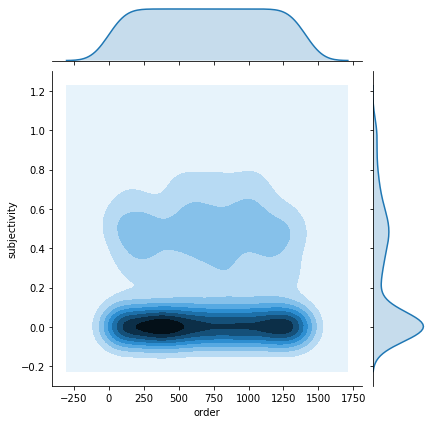

In [29]:
subjectivity = pd.Series(sentence_df["subjectivity"])
plt.figure(figsize=(10, 10))
sns.jointplot("order", "subjectivity", data=sentence_df, kind="kde")

As present on jointplot the subjectivity score of 0.0 is clearly dominating. Lets have a closer look to a subjectivity histogram:

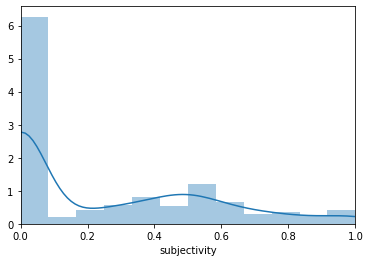

In [30]:
plt.xlim(0, None)
sns.distplot(subjectivity)

0.0 Score seems to be clearly dominating in the distribution. There is as well considerable amount of sentences scoring around 1.0 and 0.5. Let's take a closer look to only sentences scoring above 0.0 subjectivity:

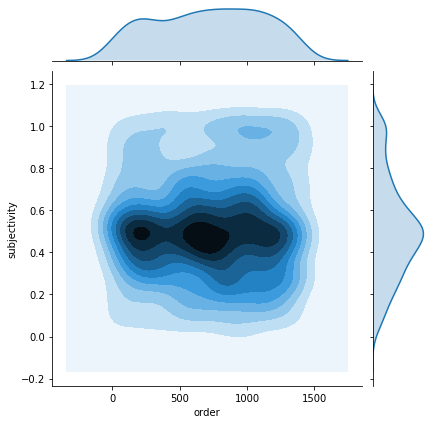

In [31]:
sns.jointplot("order", "subjectivity", data=sentence_df[sentence_df.subjectivity != 0], kind="kde")

The score of 1.0 concentrates at ending of book a bit, whereas 0.5 score sentences are present throughout the book.

<Figure size 720x720 with 0 Axes>

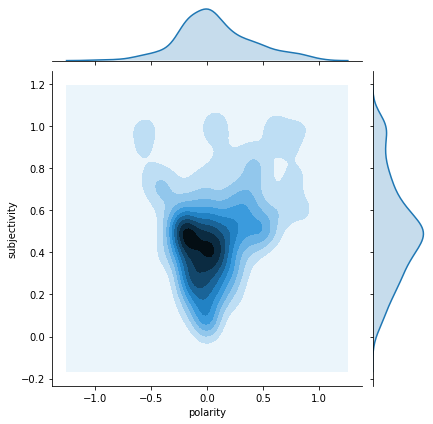

In [32]:
plt.figure(figsize=(10, 10))
sns.jointplot("polarity", "subjectivity", data=sentence_df[(sentence_df.subjectivity != 0)], kind="kde")

# Count of each word types used in the book

Text(0.5, 1.0, 'The Jungle Book - top 20 word types used')

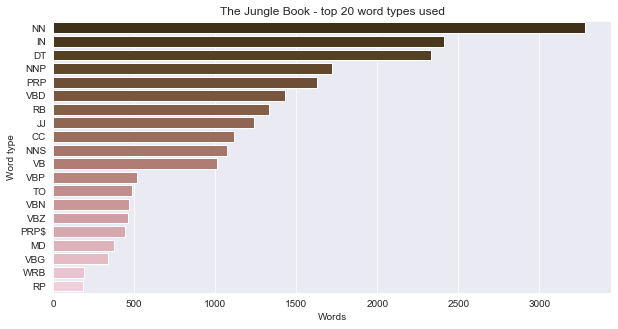

In [33]:
full_t = pd.DataFrame(my_list)
full_t.columns = ['Words', "Word type"]
xft=full_t.groupby('Word type').count().reset_index()
top20ft=xft.nlargest(20, 'Words')

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x="Words", y="Word type", palette="ch:4.5,-.3,dark=.2_r", saturation=0.9, data=top20ft).set_title("The Jungle Book - top 20 word types used")

LEGEND (in alphabetic order):

CC coordinating conjunction

DT determiner

FW foreign word

IN preposition/subordinating conjunction

JJ adjective ‘big’

MD modal could, will

NN noun, singular ‘desk’

NNS noun plural ‘desks’

NNP proper noun, singular ‘Harrison’

POS possessive ending parent‘s

PRP$ possessive pronoun my, his, hers

RB adverb very, silently,

RP particle give up

VB verb, base form take

VBN verb, past participle taken

VBP verb, sing. present, non-3d take

VBZ verb, 3rd person sing. present takes

Now let's plot top 10 most used words:

Text(0.5, 1.0, "Harry Potter and the philosopher's stone - top 10 words used")

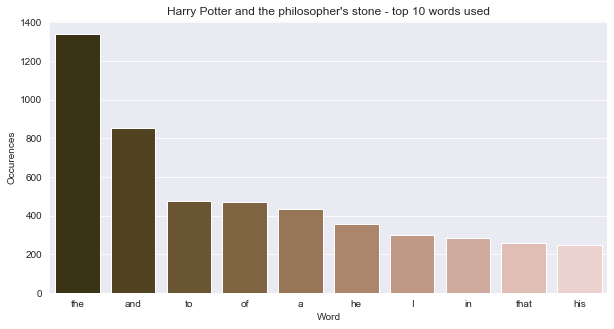

In [34]:
full = pd.DataFrame(my_list)
full.columns = ["Word", "Occurences"]
xf=full.groupby('Word').count().reset_index()

top10f=xf.nlargest(10, 'Occurences')
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurences", palette="ch:4.5,-.2,dark=.2_r", saturation=0.9, data=top10f).set_title("Harry Potter and the philosopher's stone - top 10 words used") 

In [35]:
def word_analysis(word_type, how_much):
    dict = {'NN': 'nouns', 'VB': 'verbs', 'JJ': 'adjectives', 'WP': 'pronouns', 'RB': 'adverbs', 'NNP': 'proper nouns'}
    filtered = [row for row in my_list if str(word_type) in row[1]]
    print("filtered for " + dict.get(word_type))
    df = pd.DataFrame(filtered)
    df = df[df[1]==word_type]
    df.columns = ["Word", "Occurences"]
        
    x=df.groupby('Word').count().reset_index()
    y=x.sort_values(by=['Occurences'], ascending=False)
    top10=y.nlargest(how_much, 'Occurences')
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Harry Potter and the philosophers' stone - most frequently used "+ dict.get(word_type))

Lets analyse a top 10 used Proper Nouns

filtered for proper nouns


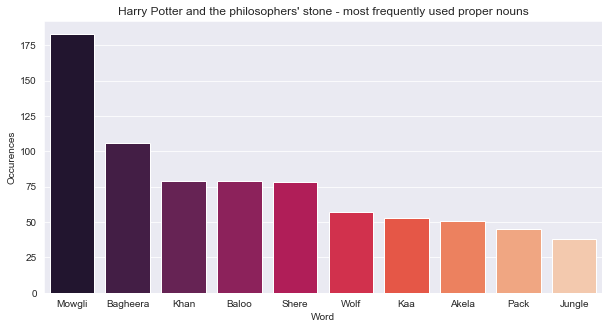

In [36]:
word_analysis(word_type='NNP', how_much=10)

### Story is about Mowgli 

Filter for nouns :

filtered for nouns


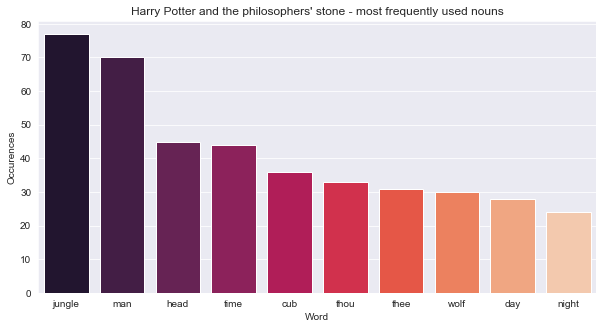

In [37]:
word_analysis(word_type='NN', how_much=10)

Filtered for adjectives :

filtered for adjectives


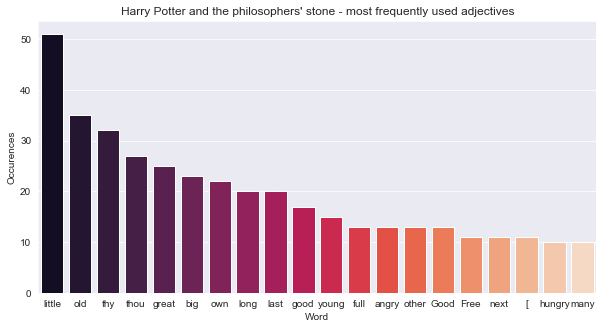

In [38]:
 word_analysis(word_type='JJ', how_much=20)

Filter for verbs :

filtered for verbs


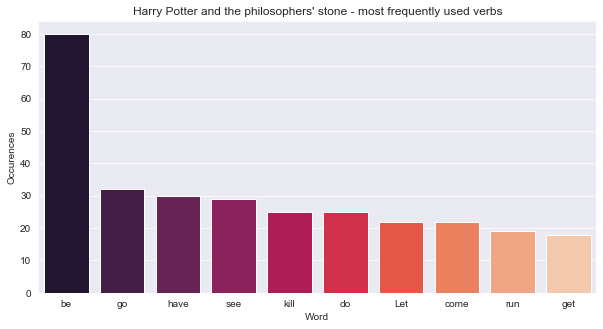

In [39]:
word_analysis(word_type='VB', how_much=10)

## Corpus

corpus (literally Latin for body) refers to a collection of texts.

In [40]:
tokens = nltk.word_tokenize(file)
text = nltk.Text(tokens)

In [41]:
tokensupper = [t for t in file.split()]
tokens=[x.lower() for x in tokens]
print(tokens)


['[', 'illustration', ']', 'mowgli', "'s", 'brothers', 'it', 'was', 'seven', "o'clock", 'of', 'a', 'very', 'warm', 'evening', 'in', 'the', 'seeonee', 'hills', 'when', 'father', 'wolf', 'woke', 'up', 'from', 'his', 'day', "'s", 'rest', ',', 'scratched', 'himself', ',', 'yawned', ',', 'and', 'spread', 'out', 'his', 'paws', 'one', 'after', 'the', 'other', 'to', 'get', 'rid', 'of', 'the', 'sleepy', 'feeling', 'in', 'the', 'tips', '.', 'mother', 'wolf', 'lay', 'with', 'her', 'big', 'gray', 'nose', 'dropped', 'across', 'her', 'four', 'tumbling', ',', 'squealing', 'cubs', ',', 'and', 'the', 'moon', 'shone', 'into', 'the', 'mouth', 'of', 'the', 'cave', 'where', 'they', 'all', 'lived', '.', '``', 'augrh', '!', "''", 'said', 'father', 'wolf', ',', '``', 'it', 'is', 'time', 'to', 'hunt', 'again', "''", ';', 'and', 'he', 'was', 'going', 'to', 'spring', 'downhill', 'when', 'a', 'little', 'shadow', 'with', 'a', 'bushy', 'tail', 'crossed', 'the', 'threshold', 'and', 'whined', ':', '``', 'good', 'luck

In [42]:
import nltk
import pprint
#nltk.download('stopwords')
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    str(key) + ':' + str(val)


In [43]:
text_corpus=cB.sentences


In [44]:
import pprint
# Create a set of frequent words
stoplist = stopwords.words('english')
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)


[['[illustration]',
  "mowgli's",
  'brothers',
  'seven',
  'warm',
  'evening',
  'seeonee',
  'hills',
  'father',
  'wolf',
  'woke',
  "day's",
  'rest,',
  'scratched',
  'himself,',
  'spread',
  'paws',
  'one',
  'get',
  'sleepy',
  'feeling'],
 ['mother',
  'wolf',
  'lay',
  'big',
  'gray',
  'nose',
  'dropped',
  'across',
  'four',
  'cubs,',
  'moon',
  'shone',
  'mouth',
  'cave',
  'lived.'],
 [],
 ['said',
  'father',
  'wolf,',
  '"it',
  'time',
  'hunt',
  'going',
  'spring',
  'little',
  'shadow',
  'bushy',
  'tail',
  'crossed',
  '"good',
  'luck',
  'go',
  'you,',
  'chief',
  'good',
  'luck',
  'strong',
  'white',
  'teeth',
  'go',
  'noble',
  'may',
  'never',
  'forget',
  'hungry'],
 ['[illustration:', 'luck', 'go', 'you,', 'chief'],
 ['wolves',
  'india',
  'despise',
  'tabaqui',
  'runs',
  'making',
  'telling',
  'eating',
  'pieces',
  'village'],
 ['afraid',
  'too,',
  'tabaqui,',
  'one',
  'else',
  'jungle,',
  'go',
  'mad,',
  'ever'

 ['go', 'people.'],
 ['jungle', 'shut', 'me,', 'must', 'forget', 'talk', 'ye'],
 ['brother',
  'blood,',
  'promise',
  'man',
  'among',
  'men',
  'ye',
  'men',
  'ye',
  'me."'],
 ['kicked', 'fire', 'foot,', 'sparks', 'flew', 'up.'],
 ['"there', 'shall', 'war', 'us', 'pack.'],
 ['debt', 'pay'],
 ['strode', 'forward', 'shere', 'khan', 'sat', 'caught', 'tuft', 'chin.'],
 ['bagheera', 'followed', 'case'],
 ['"up,'],
 ['mowgli', 'cried.'],
 ['"up,', 'man', 'set', 'coat'],
 ['shere',
  "khan's",
  'ears',
  'lay',
  'flat',
  'back',
  'head,',
  'shut',
  'eyes,',
  'blazing',
  'branch'],
 ['"this', 'said', 'would', 'kill', 'council', 'killed', 'cub.'],
 ['then,', 'beat', 'dogs'],
 ['stir', 'red', 'flower', 'thy'],
 ['beat', 'shere', 'khan', 'head', 'branch,', 'tiger', 'whimpered', 'fear.'],
 [],
 [],
 ['remember',
  'next',
  'come',
  'council',
  'rock,',
  'man',
  'come,',
  'shere',
  "khan's",
  'hide',
  'head.'],
 ['rest,', 'akela', 'goes', 'free', 'live'],
 ['ye', '_not_', '

 [],
 ['take', 'come', 'hunt', 'green'],
 ['"up,', 'up!'],
 ['up,', 'up!'],
 [],
 [],
 ['look', 'up,', 'baloo', 'seeonee', 'wolf'],
 ['baloo',
  'looked',
  'see',
  'voice',
  'came',
  'rann,',
  'kite,',
  'sun',
  'shining'],
 ['near', 'bedtime,', 'jungle', 'looking', 'bear,', 'missed', 'thick'],
 ['"what', 'it?"'],
 ['said', 'baloo.'],
 ['"i', 'seen', 'mowgli', 'among', 'bandar-log.'],
 ['bade', 'tell'],
 [],
 ['bandar-log', 'taken', 'river', 'monkey', 'cold'],
 ['may', 'stay', 'night,', 'ten'],
 ['told', 'bats', 'watch', 'dark', 'time.'],
 [],
 ['good', 'hunting,'],
 ['deep', 'sleep', 'you,'],
 ['cried', 'bagheera.'],
 ['"i',
  'remember',
  'thee',
  'next',
  'kill,',
  'put',
  'aside',
  'head',
  'thee',
  'alone,',
  'best'],
 ['"it', 'nothing.'],
 ['nothing.'],
 ['boy', 'held', 'master', 'word.'],
 ['could', 'done', 'rann'],
 ['"he', 'forgotten', 'use', 'tongue,"', 'said', 'baloo,', 'pride.'],
 ['"to',
  'think',
  'one',
  'young',
  'master',
  'word',
  'birds',
  'pull

  'one',
  'one,',
  'followed',
  'him,',
  'mowgli',
  'made',
  'clear',
  'children',
  'master.'],
 ['beat',
  'buffaloes',
  'long,',
  'bamboo,',
  'told',
  'one',
  'graze',
  'cattle',
  'themselves,',
  'went',
  'buffaloes,',
  'away',
  'herd.'],
 ['indian', 'rocks', 'little', 'among', 'herds', 'scatter'],
 ['buffaloes',
  'generally',
  'keep',
  'pools',
  'muddy',
  'lie',
  'basking',
  'warm',
  'mud'],
 ['mowgli',
  'drove',
  'edge',
  'plain',
  'waingunga',
  'river',
  'came',
  'jungle;',
  'dropped',
  "rama's",
  'neck,',
  'trotted',
  'found',
  'gray',
  'brother.'],
 ['said', 'gray', 'brother,', '"i', 'waited', 'many'],
 ['meaning'],
 ['"it', 'said', 'mowgli.'],
 ['"i', 'village', 'herd'],
 ['news', 'shere'],
 ['"he', 'come', 'back', 'waited', 'long', 'time', 'thee.'],
 ['gone', 'again,', 'game'],
 ['means', 'kill', 'thee."'],
 ['"very', 'said', 'mowgli.'],
 ['"so',
  'long',
  'away',
  'thou',
  'one',
  'brothers',
  'sit',
  'rock,',
  'see',
  'thee',

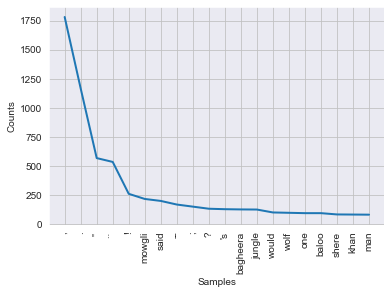

In [45]:
freq.plot(20, cumulative=False)

**Summary of the book**

In [46]:
from gensim.summarization import summarize
file = file.replace('\n','')
text = file
print ('Summary:')
print (summarize(text, ratio=0.01))

Summary:
Look well, O Wolves!" And the anxious motherswould take up the call: "Look--look well, O Wolves!"At last--and Mother Wolf's neck-bristles lifted as the time came--FatherWolf pushed "Mowgli, the Frog," as they called him, into the center,where he sat laughing and playing with some pebbles that glistened inthe moonlight.Akela never raised his head from his paws, but went on with themonotonous cry, "Look well!" A muffled roar came up from behind therocks--the voice of Shere Khan crying, "The cub is mine; give him to me.What have the Free People to do with a man's cub?"Akela never even twitched his ears.
He was thinking of the time that comes to everyleader of every pack when his strength goes from him and he gets feeblerand feebler, till at last he is killed by the wolves and a new leadercomes up--to be killed in his turn."Take him away," he said to Father Wolf, "and train him as befits one ofthe Free People."And that is how Mowgli was entered into the Seeonee wolf-pack for thepr

** Keywords extraction**

In [47]:
from gensim.summarization import keywords
print ('Keywords:')
print (keywords(text, ratio = 0.01))

Keywords:
mowgli
mowglis
said
bagheera
baloo
wolf
thou
_thou_
little
akela
_thee_
thee
for_thee_
thy
_thy_
man
jungle
jungles
kaa
shere
look
looked
looks
looking
like
likely
old
hunting
hunt
hunts
hunted
monkey
monkeys
come
coming
comes


Before proceeding, we want to associate each word in the corpus with a unique integer ID. We can do this using the gensim.corpora.Dictionary class. This dictionary defines the vocabulary of all words that our processing knows about.

In [48]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(1657 unique tokens: ['[illustration]', 'brothers', "day's", 'evening', 'father']...)


There are 1657 different tokens in this gensim.corpora.Dictionary.

**Vector**

In [49]:
pprint.pprint(dictionary.token2id)

{'"a': 308,
 '"akela!': 876,
 '"all': 112,
 '"and': 402,
 '"are': 929,
 '"as': 745,
 '"at': 1263,
 '"ay,': 618,
 '"bagheera': 684,
 '"baloo': 562,
 '"baloo,': 1267,
 '"but': 91,
 '"by': 154,
 '"come': 670,
 '"feet': 1069,
 '"for': 96,
 '"free': 926,
 '"get': 290,
 '"give': 961,
 '"good': 35,
 '"good!': 588,
 '"good!"': 843,
 '"have': 1138,
 '"he': 151,
 '"his': 172,
 '"how': 116,
 '"i': 202,
 '"if': 901,
 '"in': 1247,
 '"is': 326,
 '"it': 36,
 '"keep': 434,
 '"let': 932,
 '"listen,': 981,
 '"little': 738,
 '"look': 522,
 '"look--look': 515,
 '"man!"': 239,
 '"mowgli,': 517,
 '"mowgli,"': 1148,
 '"my': 362,
 '"never': 1037,
 '"no': 960,
 '"no,"': 1179,
 '"not': 815,
 '"now': 977,
 '"now,"': 1035,
 '"oh,': 804,
 '"remember': 842,
 '"shall': 191,
 '"shere': 133,
 '"so': 1481,
 '"some': 868,
 '"something': 288,
 '"tabaqui': 286,
 '"take': 631,
 '"tell': 1115,
 '"that': 725,
 '"the': 215,
 '"there': 785,
 '"they': 380,
 '"this': 910,
 '"thou': 991,
 '"tiger!': 1507,
 '"till': 1429,
 '"to': 

 'left,': 1611,
 'left.': 616,
 'legs': 1206,
 'legs.': 1534,
 'lend': 1654,
 'length': 487,
 'less': 1310,
 'lesson': 1080,
 'let': 558,
 'level': 1347,
 'licking': 113,
 'lie': 447,
 'life': 581,
 'life,': 994,
 'life.': 701,
 'lifted': 520,
 'light': 995,
 'lights': 567,
 'like': 221,
 'limped': 1573,
 'lines': 1486,
 'lip.': 957,
 'lips': 1290,
 'listen': 1170,
 'listening': 1438,
 'lit': 986,
 'little': 46,
 'little,': 473,
 'little.': 1156,
 'live': 408,
 'lived': 144,
 'lived,': 1510,
 'lived.': 29,
 'lives': 840,
 'lives,': 934,
 'living': 267,
 'lock': 797,
 'lone': 488,
 'long': 685,
 'long,': 935,
 'long.': 941,
 'look': 127,
 'look!"': 311,
 'look,"': 94,
 'looked': 325,
 'looking': 916,
 'lord,': 364,
 'lost': 1314,
 'love': 761,
 'loved': 698,
 'low': 318,
 'lower': 997,
 'luck': 47,
 'lying': 857,
 'mad': 1614,
 'mad,': 79,
 'made': 297,
 'madness': 86,
 'madness.': 1410,
 'magic': 1634,
 'make': 183,
 'makes': 234,
 'making': 65,
 'man': 251,
 "man's": 310,
 'man,': 948

We can create the bag-of-word representation for a document using the doc2bow method of the dictionary, 
which returns a sparse representation of the word counts:

In [50]:
# lets take an example of a document and see

new_doc = "Shere Khan roared still in the night, for he was very angry that Mowgli had not been handed over to him."
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(143, 1), (148, 1), (179, 1), (266, 1), (432, 1), (438, 1), (475, 1), (617, 1)]


We can convert our entire original corpus to a list of vectors:

In [51]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
print('vector size')
print(len(bow_corpus))
pprint.pprint(bow_corpus)

vector size
1547
[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [],
 [(4, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(38, 1), (41, 1), (47, 1), (60, 1), (61, 1)],
 [(62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(10, 1),
  (41, 1),
  (67, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  

  (739, 1),
  (740, 1),
  (741, 1),
  (742, 1),
  (743, 1),
  (744, 1)],
 [(51, 1), (315, 1), (449, 1), (553, 1), (639, 1), (688, 1), (745, 1)],
 [(279, 1), (746, 1)],
 [(55, 1),
  (143, 1),
  (148, 1),
  (221, 1),
  (565, 1),
  (685, 1),
  (747, 1),
  (748, 1)],
 [(57, 1), (91, 1)],
 [(84, 1),
  (109, 3),
  (211, 1),
  (254, 1),
  (511, 2),
  (598, 1),
  (749, 1),
  (750, 1),
  (751, 1),
  (752, 1)],
 [(68, 1), (141, 1), (620, 1)],
 [],
 [(753, 1)],
 [(51, 1), (754, 1)],
 [(55, 1),
  (68, 1),
  (207, 1),
  (286, 1),
  (310, 1),
  (314, 1),
  (319, 1),
  (385, 1),
  (497, 1),
  (503, 1),
  (559, 1),
  (596, 1),
  (685, 1),
  (755, 1),
  (756, 1),
  (757, 1)],
 [(68, 1), (141, 1), (294, 1), (339, 1), (620, 2), (725, 1), (732, 1)],
 [(46, 1), (396, 1), (758, 1)],
 [(143, 1),
  (148, 1),
  (157, 1),
  (168, 2),
  (460, 1),
  (510, 1),
  (619, 1),
  (620, 1),
  (629, 1),
  (715, 1),
  (734, 1),
  (759, 1),
  (760, 1),
  (761, 1),
  (762, 1),
  (763, 1),
  (764, 1)],
 [(71, 2),
  (82, 1),
 

  (148, 1),
  (181, 1),
  (202, 1),
  (358, 1),
  (402, 1),
  (470, 1),
  (498, 1),
  (773, 1),
  (784, 1),
  (803, 1),
  (1019, 1)],
 [(40, 1), (403, 1)],
 [(40, 1), (49, 1), (157, 1), (192, 1), (1044, 1)],
 [(365, 1),
  (413, 1),
  (437, 1),
  (475, 1),
  (496, 1),
  (544, 1),
  (690, 1),
  (819, 1),
  (976, 1),
  (1045, 1),
  (1046, 1),
  (1047, 1)],
 [(14, 1),
  (254, 1),
  (330, 1),
  (410, 1),
  (1047, 1),
  (1048, 1),
  (1049, 1),
  (1050, 1),
  (1051, 1)],
 [(89, 1), (749, 1), (1052, 2), (1053, 2), (1054, 1)],
 [(390, 1), (482, 1), (1048, 1), (1050, 1), (1051, 1)],
 [(330, 1), (410, 1), (1047, 1), (1048, 1), (1049, 1), (1050, 1), (1051, 1)],
 [(20, 2),
  (104, 1),
  (108, 1),
  (409, 1),
  (606, 1),
  (786, 1),
  (1048, 1),
  (1050, 1),
  (1051, 1),
  (1055, 1),
  (1056, 2),
  (1057, 1),
  (1058, 1)],
 [(330, 1), (634, 1), (1047, 1), (1048, 1), (1050, 1), (1051, 1), (1059, 1)],
 [(157, 1), (452, 1), (1032, 1)],
 [(131, 1), (366, 1)],
 [(1060, 1)],
 [(1061, 1)],
 [(1061, 1)],
 [

  (1255, 1)],
 [(201, 1), (1092, 1), (1256, 1)],
 [(190, 1), (546, 1), (617, 1), (624, 1), (1257, 1), (1258, 1), (1259, 1)],
 [(201, 1), (279, 1), (602, 1), (1092, 1), (1172, 1), (1256, 1), (1260, 1)],
 [],
 [(1261, 1)],
 [(48, 1), (1262, 1)],
 [(598, 1)],
 [(1263, 1)],
 [(294, 1), (574, 1)],
 [(294, 1), (563, 1), (604, 1), (620, 1), (783, 1), (922, 1), (1087, 1)],
 [(432, 1), (1024, 1)],
 [(183, 1)],
 [(57, 1)],
 [(48, 1), (679, 1), (1038, 1)],
 [],
 [(25, 1), (48, 1), (266, 1), (1101, 1), (1239, 1)],
 [],
 [(614, 1), (782, 1), (1264, 1)],
 [(265, 1), (483, 1), (944, 1)],
 [(48, 1), (89, 1), (231, 1), (1084, 1)],
 [],
 [(449, 1)],
 [(195, 1), (330, 1), (620, 1), (1023, 1), (1092, 1), (1149, 1), (1167, 1)],
 [(2, 1),
  (48, 1),
  (157, 1),
  (162, 1),
  (437, 1),
  (743, 1),
  (881, 1),
  (1080, 1),
  (1107, 1),
  (1265, 1)],
 [(11, 1), (598, 1), (729, 1), (1266, 1)],
 [(46, 1), (51, 1), (57, 1), (535, 1), (565, 1), (736, 1), (992, 1), (1263, 1)],
 [(199, 1), (201, 1), (226, 1), (1267,

  (658, 1),
  (854, 1),
  (1298, 2),
  (1347, 1),
  (1349, 1),
  (1350, 1)],
 [(51, 1),
  (154, 1),
  (565, 1),
  (703, 1),
  (727, 1),
  (797, 1),
  (851, 1),
  (852, 1),
  (991, 1),
  (1351, 1)],
 [(51, 1), (202, 1), (1283, 1), (1308, 1)],
 [(413, 1)],
 [(1293, 1)],
 [(112, 1), (328, 1)],
 [(41, 1),
  (210, 1),
  (232, 1),
  (367, 1),
  (396, 1),
  (420, 1),
  (558, 1),
  (1226, 1),
  (1298, 1),
  (1352, 1),
  (1353, 1),
  (1354, 1)],
 [(9, 1), (444, 1), (529, 1), (630, 1), (720, 1), (1149, 1), (1336, 1)],
 [(130, 1), (710, 1), (766, 1), (1314, 1), (1339, 1), (1341, 1)],
 [(49, 1),
  (232, 1),
  (292, 1),
  (293, 1),
  (302, 1),
  (339, 1),
  (475, 1),
  (1028, 1),
  (1355, 1),
  (1356, 1)],
 [(46, 1), (685, 1), (755, 1), (1357, 1), (1358, 1)],
 [(315, 1),
  (432, 1),
  (486, 1),
  (543, 1),
  (1054, 1),
  (1359, 1),
  (1360, 1),
  (1361, 1),
  (1362, 1)],
 [(37, 1),
  (89, 1),
  (281, 1),
  (464, 1),
  (1155, 1),
  (1222, 1),
  (1360, 1),
  (1363, 1),
  (1364, 1),
  (1365, 1),
  (13

 [(195, 1), (710, 1), (1027, 1), (1483, 1)],
 [(51, 1),
  (94, 1),
  (475, 1),
  (822, 1),
  (909, 1),
  (932, 1),
  (1537, 1),
  (1538, 1)],
 [(1342, 1)],
 [(127, 1), (1420, 1)],
 [(126, 1), (899, 1), (948, 1), (967, 1), (1382, 1), (1530, 1), (1539, 1)],
 [(51, 1), (157, 2), (279, 1), (325, 1), (1027, 1)],
 [(40, 1),
  (186, 1),
  (195, 1),
  (383, 1),
  (710, 1),
  (840, 1),
  (955, 1),
  (1530, 1)],
 [(8, 1),
  (51, 1),
  (91, 1),
  (154, 1),
  (221, 1),
  (386, 1),
  (475, 1),
  (499, 1),
  (500, 1),
  (580, 1),
  (727, 1),
  (878, 1)],
 [(188, 1), (251, 1), (513, 1), (948, 1)],
 [(46, 1),
  (109, 1),
  (260, 1),
  (357, 1),
  (475, 1),
  (524, 1),
  (602, 1),
  (835, 1),
  (909, 1),
  (1397, 1),
  (1434, 1),
  (1458, 1),
  (1511, 1),
  (1537, 1),
  (1540, 1)],
 [(88, 1),
  (104, 1),
  (124, 1),
  (157, 1),
  (166, 1),
  (181, 1),
  (260, 1),
  (266, 1),
  (325, 1),
  (337, 1),
  (491, 1),
  (685, 1),
  (743, 1),
  (992, 1),
  (1027, 1),
  (1043, 1),
  (1176, 1),
  (1193, 1),
  (15

 [],
 [(32, 1),
  (221, 1),
  (302, 1),
  (371, 1),
  (498, 1),
  (512, 1),
  (782, 1),
  (1123, 1),
  (1143, 1),
  (1313, 1)],
 [(16, 1), (57, 1), (88, 1), (104, 1), (314, 1), (685, 1)],
 [(538, 1)],
 [(51, 1), (134, 1), (148, 1), (849, 1), (1613, 1)],
 [(754, 1)],
 [(57, 1), (181, 1), (470, 1)],
 [(539, 1), (1234, 1)],
 [(1234, 1), (1583, 1)],
 [(10, 1),
  (453, 1),
  (461, 1),
  (477, 1),
  (510, 1),
  (847, 1),
  (992, 1),
  (1060, 1),
  (1445, 1),
  (1560, 1)],
 [(143, 1), (148, 1), (1309, 1), (1457, 1), (1594, 1), (1615, 1), (1622, 1)],
 [],
 [],
 [(51, 1), (449, 1), (869, 1)],
 [(201, 1), (977, 1)],
 [(221, 1),
  (366, 1),
  (469, 1),
  (483, 1),
  (989, 1),
  (998, 1),
  (1237, 1),
  (1518, 1),
  (1594, 2),
  (1623, 1),
  (1624, 1)],
 [(88, 1), (126, 1), (624, 1), (644, 1), (799, 1), (1519, 1)],
 [(143, 1),
  (148, 1),
  (209, 1),
  (246, 1),
  (345, 1),
  (431, 1),
  (442, 2),
  (822, 1),
  (916, 1),
  (1081, 1),
  (1137, 1),
  (1166, 1),
  (1284, 1),
  (1289, 1),
  (1366, 1),

### Model

The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.

Here’s a simple example. Let’s initialize the tf-idf model, training it on our corpus and transforming the string “silence set”:

In [52]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "silence set".lower().split()
print(tfidf[dictionary.doc2bow(words)])

[(190, 1.0)]


The tfidf model again returns a list of tuples, where the first entry is the token ID and the second entry is the tf-idf weighting. Note that the ID corresponding to “silence” has been weighted higher than the ID corresponding to “set”(which is 0 hence not visible in the result), while the count of "set" is more than "silence"

In [53]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=3448)
index

lets query the similarity of our query document query_document against every document in the corpus:

In [54]:
query_document = 'man cub'.split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
print(list(enumerate(sims)))

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.13248026), (55, 0.0), (56, 0.0), (57, 0.16036521), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.0), (82, 0.0), (83, 0.0), (84, 0.0), (85, 0.0), (86, 0.0), (87, 0.0), (88, 0.0), (89, 0.0), (90, 

Lets sort it

In [55]:
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)

1242 0.7294925
108 0.44057104
506 0.40840623
259 0.37830976
390 0.37697315
1523 0.3525745
192 0.34842137
100 0.3370967
196 0.33157784
1138 0.31562522
1116 0.31495386
405 0.31389144
129 0.309149
1165 0.30114913
117 0.2982751
472 0.27663842
1091 0.27450332
1373 0.27268517
1126 0.27081403
449 0.26127455
127 0.25966516
427 0.25322083
91 0.24667963
152 0.24076694
1351 0.23547132
1529 0.21087489
1478 0.20450962
158 0.20054804
426 0.19771715
1453 0.18647027
457 0.17512153
1174 0.17510426
165 0.17055665
441 0.1642444
57 0.16036521
928 0.14667246
1090 0.14589477
199 0.14555441
185 0.14501268
331 0.13970616
54 0.13248026
517 0.12296763
1195 0.11231211
640 0.098517865
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
4

1026 0.0
1027 0.0
1028 0.0
1029 0.0
1030 0.0
1031 0.0
1032 0.0
1033 0.0
1034 0.0
1035 0.0
1036 0.0
1037 0.0
1038 0.0
1039 0.0
1040 0.0
1041 0.0
1042 0.0
1043 0.0
1044 0.0
1045 0.0
1046 0.0
1047 0.0
1048 0.0
1049 0.0
1050 0.0
1051 0.0
1052 0.0
1053 0.0
1054 0.0
1055 0.0
1056 0.0
1057 0.0
1058 0.0
1059 0.0
1060 0.0
1061 0.0
1062 0.0
1063 0.0
1064 0.0
1065 0.0
1066 0.0
1067 0.0
1068 0.0
1069 0.0
1070 0.0
1071 0.0
1072 0.0
1073 0.0
1074 0.0
1075 0.0
1076 0.0
1077 0.0
1078 0.0
1079 0.0
1080 0.0
1081 0.0
1082 0.0
1083 0.0
1084 0.0
1085 0.0
1086 0.0
1087 0.0
1088 0.0
1089 0.0
1092 0.0
1093 0.0
1094 0.0
1095 0.0
1096 0.0
1097 0.0
1098 0.0
1099 0.0
1100 0.0
1101 0.0
1102 0.0
1103 0.0
1104 0.0
1105 0.0
1106 0.0
1107 0.0
1108 0.0
1109 0.0
1110 0.0
1111 0.0
1112 0.0
1113 0.0
1114 0.0
1115 0.0
1117 0.0
1118 0.0
1119 0.0
1120 0.0
1121 0.0
1122 0.0
1123 0.0
1124 0.0
1125 0.0
1127 0.0
1128 0.0
1129 0.0
1130 0.0
1131 0.0
1132 0.0
1133 0.0
1134 0.0
1135 0.0
1136 0.0
1137 0.0
1139 0.0
1140 0.0
1141 0.0
1

What does this output mean?   Document 1242 has a similarity score of 0.799=79.9%, document 108 has a similarity score of 49% etc

### Applying transformation to whole corpus

In [56]:
corpus = [dictionary.doc2bow(text) for text in processed_corpus]
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.23192000127960063), (1, 0.22323363390324724), (2, 0.2431186765457667), (3, 0.2161363549829573), (4, 0.15480503904867066), (5, 0.23192000127960063), (6, 0.16382844109759817), (7, 0.2431186765457667), (8, 0.2161363549829573), (9, 0.1860381900065448), (10, 0.11434313186433105), (11, 0.22323363390324724), (12, 0.25890232284241), (13, 0.25890232284241), (14, 0.2101356911573255), (15, 0.25890232284241), (16, 0.2431186765457667), (17, 0.2431186765457667), (18, 0.2049376797167913), (19, 0.2431186765457667), (20, 0.13438673790943165)]
[(20, 0.17410293511946368), (21, 0.24944410086637864), (22, 0.2100993853034735), (23, 0.24944410086637864), (24, 0.300460845793433), (25, 0.24944410086637864), (26, 0.2595642634389298), (27, 0.2005555911910053), (28, 0.2305476764807251), (29, 0.335417430449787), (30, 0.2542507544348902), (31, 0.20804066307634744), (32, 0.2542507544348902), (33, 0.300460845793433), (34, 0.335417430449787)]
[]
[(4, 0.13375474689216155), (35, 0.20038366490531334), (36, 0.15824

[(32, 0.30553866050034917), (106, 0.36107033216311146), (148, 0.17876153158772023), (166, 0.23137192161083256), (356, 0.4030784201049098), (357, 0.25000698883758693), (358, 0.2809655043274006), (359, 0.3364971759901628), (360, 0.37850526393196127), (361, 0.36107033216311146)]
[(81, 0.30818517626068453), (182, 0.21560192845011644), (362, 0.33563747036432384), (363, 0.2829266981038753), (364, 0.7893560480624692), (365, 0.2067721135850741)]
[(4, 0.2966240007916985), (51, 0.16003645168694014), (59, 0.3243385716833644), (133, 0.46584293991564), (143, 0.26552829002205713), (180, 0.4277409443941428), (357, 0.3076945072565575), (366, 0.3364607034555157), (367, 0.3206993599246207)]
[(143, 0.5638603530759557), (148, 0.4671995561063958), (279, 0.6810184116476188)]
[(362, 1.0)]
[(51, 0.22535178947991089), (148, 0.3098016729039075), (277, 0.5405781786494982), (310, 0.42915382692154297), (350, 0.4620975670288985), (365, 0.4041132992079083)]
[(189, 0.5769657114911527), (368, 0.8167683684885869)]
[(13

[(254, 0.6483265134146012), (923, 0.5383645289223962), (931, 0.5383645289223962)]
[(201, 0.3958288250978397), (310, 0.5027597576099275), (888, 0.7684739210602208)]
[(932, 0.6817746975469423), (933, 0.7315622063671519)]
[(20, 0.2915412386557053), (254, 0.3175771554685712), (391, 0.527426449983902), (543, 0.36721548573170276), (614, 0.42575146608662057), (932, 0.468890469628984)]
[(20, 0.2130657293809908), (249, 0.36770149346121156), (254, 0.23209343754130088), (413, 0.27487301619322774), (614, 0.31114996655378585), (629, 0.333163190073028), (685, 0.2597445762790602), (882, 0.36770149346121156), (934, 0.4104810721131384), (935, 0.333163190073028)]
[(10, 0.14511440689283292), (57, 0.1886068668221044), (82, 0.24435656121785052), (134, 0.25427031791365984), (148, 0.1457205876423945), (166, 0.1886068668221044), (249, 0.29433279361462755), (384, 0.37434958462523626), (458, 0.19479031549990525), (486, 0.27430155576414367), (510, 0.1999954527780272), (524, 0.3085451830492925), (540, 0.266686032

[(51, 0.14495901944714293), (113, 0.40251839163309605), (565, 0.2599485352830997), (847, 0.29378182798053204), (916, 0.36470972733129037), (1290, 0.42195471765796566), (1398, 0.38744240592176143), (1467, 0.44934868060371075)]
[(36, 0.32256269630550966), (46, 0.21321058889368655), (128, 0.34563029117167693), (201, 0.22054429802994002), (703, 0.28852837274554777), (1066, 0.4559688501538099), (1348, 0.42817129710715185), (1479, 0.4559688501538099)]
[(1016, 0.8024266683108549), (1079, 0.5967507368940078)]
[(51, 0.20817867084420755), (98, 0.5387240149882554), (405, 0.45651329057698703), (475, 0.24029095956047916), (528, 0.5108111018533303), (565, 0.3733175125599325)]
[(91, 0.34515679017247963), (195, 0.26850053544644414), (201, 0.2395044715906964), (701, 0.4133756043999237), (1274, 0.34515679017247963), (1448, 0.4951684513878491), (1474, 0.46498114519392353)]
[(599, 0.5731572435854564), (802, 0.6103675119763707), (1118, 0.5467561380078844)]
[(166, 0.275012987899271), (176, 0.363168959128392

[(28, 0.3285676292042946), (266, 0.3285676292042946), (475, 0.17799697601852302), (847, 0.31252956682251226), (953, 0.4121671109603965), (971, 0.44888183191881526), (1389, 0.4282051733421787), (1518, 0.316216184922429)]
[(10, 0.27908212125717413), (64, 0.5933900432964697), (544, 0.41314198972031085), (1595, 0.6319138568200194)]
[(84, 0.25931097485097243), (447, 0.3102932464022485), (700, 0.31816348210974893), (949, 0.30335120652128017), (1234, 0.31816348210974893), (1471, 0.73620510889607)]
[(6, 0.1877845934479974), (10, 0.13106319261087662), (219, 0.22964969754214495), (221, 0.16422249890209878), (255, 0.22494856604007185), (272, 0.21324200878752353), (345, 0.22964969754214495), (366, 0.20127220899698614), (447, 0.2349051154363805), (478, 0.1759290561546471), (998, 0.26583298272858513), (1089, 0.2786692074275698), (1186, 0.26583298272858513), (1518, 0.1963093789103063), (1569, 0.29676085002078983), (1588, 0.26583298272858513), (1589, 0.29676085002078983), (1596, 0.29676085002078983)]


[(36, 0.3321617785890338), (99, 0.4206035645751486), (166, 0.26952049587988897), (294, 0.20736947473902115), (620, 0.25983445587782494), (965, 0.40485021401657006), (1553, 0.38109615495680726), (1596, 0.4695379409429221)]
[]
[(323, 1.0)]
[(41, 1.0)]
[(1313, 0.583537070538032), (1529, 0.8120865023554399)]
[]
[(57, 0.48243158397470437), (543, 0.5494853077246954), (650, 0.6821478310295757)]
[(57, 0.5957546230015711), (193, 0.8031665015252166)]
[(367, 0.38996336639461604), (558, 0.4039446230994571), (1636, 0.5664547665557138), (1637, 0.6032298996116884)]
[(21, 0.49719600301217304), (804, 0.5988834014165578), (1610, 0.6278015658601475)]
[(201, 0.26987620886021874), (247, 0.4416617706294018), (272, 0.4009314271369078), (703, 0.3530671347241344), (824, 0.41494597032031616), (1021, 0.5239457444071102)]
[(41, 0.3259184072226081), (168, 0.3728029167840903), (765, 0.6010584400320625), (810, 0.3764920881209417), (823, 0.5017744875133743)]
[(199, 0.353438727809593), (201, 0.45105361487337914), (511

Transformations can also be serialized, one on top of another, in a sort of chain:

In [57]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [58]:
lsi_model.print_topics(2)

[(0,
  '-0.756*"said" + -0.438*"mowgli." + -0.097*"mowgli" + -0.093*"mowgli," + -0.092*"bagheera." + -0.091*"wolf." + -0.089*"father" + -0.086*""i" + -0.084*"shere" + -0.073*"baloo,"'),
 (1,
  '0.352*"mowgli." + 0.253*"said" + -0.235*"mowgli" + -0.228*"thou" + -0.223*"shere" + -0.182*"would" + -0.159*"khan" + -0.150*"jungle" + -0.150*"one" + -0.130*"go"')]

It appears that according to LSI, “said”, “mowgli” and “troop-horse” are all related words (and contribute the most to the direction of the first topic)

In [59]:
# both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
for doc, as_text in zip(corpus_lsi, text_corpus):
    print(doc, as_text)

[(0, -0.04936456643789275), (1, -0.08581020218726171)]                              [Illustration]

                           MOWGLI'S BROTHERS


IT was seven o'clock of a very warm evening in the Seeonee hills when
Father Wolf woke up from his day's rest, scratched himself, yawned, and
spread out his paws one after the other to get rid of the sleepy feeling
in the tips.
[(0, -0.05204144021545075), (1, -0.08871574759774697)] Mother Wolf lay with her big gray nose dropped across her
four tumbling, squealing cubs, and the moon shone into the mouth of the
cave where they all lived.
[] "Augrh!"
[(0, -0.13944953635354812), (1, -0.10265747749557283)] said Father Wolf, "it is time to
hunt again"; and he was going to spring downhill when a little shadow
with a bushy tail crossed the threshold and whined: "Good luck go with
you, O Chief of the Wolves; and good luck and strong white teeth go with
the noble children, that they may never forget the hungry in this
world."
[(0, -0.02076912559356011

[(0, -0.06103919116593407), (1, -0.11310256895658859)] "O Akela, and ye, the Free People," he purred, "I have no right in your
assembly; but the Law of the Jungle says that if there is a doubt which
is not a killing matter in regard to a new cub, the life of that cub may
be bought at a price.
[(0, -0.026454220545142106), (1, -0.06941316414755734)] And the Law does not say who may or may not pay
that price.
[] Am I right?"
[(0, 0.00031805398721416084), (1, 0.0008779127287763757)] "Good!
[] good!"
[(0, -0.2079104872638348), (1, 0.029858250656539707)] said the young wolves, who are always hungry.
[(0, -0.0922876302699435), (1, 0.01434914042943166)] "Listen to
Bagheera.
[(0, -0.02108996471964609), (1, -0.04517020085280293)] The cub can be bought for a price.
[] It is the Law."
[(0, -0.008145585953033371), (1, -0.03016573323516168)] "Knowing that I have no right to speak here, I ask your leave."
[(0, -0.012468203750310563), (1, -0.010798342767396754)] "Speak then," cried twenty voices.
[(0,

[] Singed jungle-cat--go now!
[(0, -0.056203209174711784), (1, -0.15172171336786086)] But remember when next I come to the
Council Rock, as a man should come, it will be with Shere Khan's hide on
my head.
[(0, -0.021360997604874237), (1, -0.04030206471870251)] For the rest, Akela goes free to live as he pleases.
[(0, -0.034489692139930465), (1, -0.10469538517192836)] Ye will
_not_ kill him, because that is not my will.
[(0, -0.03932701049660645), (1, -0.10019577972355971)] Nor do I think that ye will
sit here any longer, lolling out your tongues as though ye were
somebodies, instead of dogs whom I drive out--thus!
[(0, -0.00012675367369842038), (1, 0.0007067093059916565)] Go!"
[(0, -0.0267717648902258), (1, -0.07286978294789632)] The fire was burning furiously at the end of the branch, and Mowgli
struck right and left round the circle, and the wolves ran howling with
the sparks burning their fur.
[(0, -0.05346349335114603), (1, -0.08632808992193276)] At last there were only Akela, Bagh

[(0, -0.000880180443302413), (1, -0.0036852911102342786)] "Here, in a trap.
[(0, -0.17852775491999068), (1, 0.12404350923341514)] I cannot climb out," cried Mowgli.
[(0, -0.00481239935769049), (1, -0.0075044817981726715)] The curve of the
broken dome was above his head.
[(0, -0.009405453902749744), (1, -0.014676652839409284)] "Take him away.
[(0, -0.016529936697132125), (1, -0.03584362698017002)] He dances like Mao, the Peacock.
[(0, -0.7562958849917828), (1, 0.2534587835205947)] He will crush our
young," said the cobras inside.
[] "Hah!"
[(0, -0.16423014428200045), (1, 0.019718958849197853)] said Kaa, with a chuckle, "he has friends everywhere, this
manling.
[(0, -0.01896466567592434), (1, -0.04073537582236513)] Stand back, Manling; and hide you, O Poison People.
[(0, -0.0025878649229681677), (1, -0.0028556072640289914)] I break
down the wall."
[(0, -0.04536052809608578), (1, -0.09130144657726602)] Kaa looked carefully till he found a discolored crack in the marble
tracery showing a w

[(0, -0.5638608778434131), (1, 0.3178334075155729)] "It is an order," said Mowgli.
[(0, -0.05854139161091035), (1, -0.08744563924251178)] "I am a village herd for a while.
[(0, -0.044406106950996165), (1, -0.11681674229771347)] What
news of Shere Khan?"
[(0, -0.06832102850685229), (1, -0.12436314871019756)] "He has come back to this country, and has waited here a long time for
thee.
[(0, -0.008372245091770507), (1, -0.02129352153476701)] Now he has gone off again, for the game is scarce.
[(0, -0.012805348260721564), (1, -0.037508606935608375)] But he means to
kill thee."
[(0, -0.4488149444966735), (1, 0.2689637686841609)] "Very good," said Mowgli.
[(0, -0.0712885922721072), (1, -0.19223866498862144)] "So long as he is away do thou or one of the
brothers sit on that rock, so that I can see thee as I come out of the
village.
[(0, -0.022406790276165642), (1, -0.058434825251427416)] When he comes back wait for me in the ravine by the _dhâk_-tree
in the center of the plain.
[(0, -0.04333865

Similarly using **LDA**

In [60]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=100)
corpus_lda=model[corpus_tfidf]

In [61]:
for doc, as_text in zip(corpus_lda, text_corpus):
    print(doc, as_text)

[(16, 0.8201038)]                              [Illustration]

                           MOWGLI'S BROTHERS


IT was seven o'clock of a very warm evening in the Seeonee hills when
Father Wolf woke up from his day's rest, scratched himself, yawned, and
spread out his paws one after the other to get rid of the sleepy feeling
in the tips.
[(50, 0.7942374)] Mother Wolf lay with her big gray nose dropped across her
four tumbling, squealing cubs, and the moon shone into the mouth of the
cave where they all lived.
[] "Augrh!"
[(11, 0.83273625)] said Father Wolf, "it is time to
hunt again"; and he was going to spring downhill when a little shadow
with a bushy tail crossed the threshold and whined: "Good luck go with
you, O Chief of the Wolves; and good luck and strong white teeth go with
the noble children, that they may never forget the hungry in this
world."
[(11, 0.55861974), (21, 0.13512251)] [Illustration: "'GOOD LUCK GO WITH YOU, O CHIEF OF THE WOLVES.'"]
[(79, 0.7594782)] It was the jac

[(84, 0.81499225)] Many of the wolves that looked thee over when thou wast brought
to the Council first are old too, and the young wolves believe, as Shere
Khan has taught them, that a man-cub has no place with the Pack.
[(8, 0.36076915), (75, 0.32914063)] In a
little time thou wilt be a man."
[(26, 0.6373925)] "And what is a man that he should not run with his brothers?"
[(17, 0.5759944)] said
Mowgli.
[(84, 0.73632795)] "I was born in the jungle; I have obeyed the Law of the Jungle;
and there is no wolf of ours from whose paws I have not pulled a thorn.
[(50, 0.22570671), (76, 0.28425714)] Surely they are my brothers!"
[(50, 0.7242843)] Bagheera stretched himself at full length and half shut his eyes.
[(31, 0.3178472), (82, 0.30713475)] "Little Brother," said he, "feel under my jaw."
[(98, 0.7917716)] Mowgli put up his strong brown hand, and just under Bagheera's silky
chin, where the giant rolling muscles were all hid by the glossy hair,
he came upon a little bald spot.
[(75, 0.80111

[(37, 0.8400123)] Then he turned aside to tell
Bagheera how he had begged the Master Words from Hathi, the Wild
Elephant, who knows all about these things, and how Hathi had taken
Mowgli down to a pool to get the Snake Word from a water-snake, because
Baloo could not pronounce it, and how Mowgli was now reasonably safe
against all accidents in the jungle, because neither snake, bird, nor
beast would hurt him.
[(40, 0.7215428)] "No one then is to be feared," Baloo wound up, patting his big furry
stomach with pride.
[(2, 0.7170221)] "Except his own tribe," said Bagheera, under his breath; and then aloud
to Mowgli: "Have a care for my ribs, Little Brother!
[(42, 0.5049766)] What is all this
dancing up and down?"
[(0, 0.35108665), (26, 0.1755027), (38, 0.18445306)] Mowgli had been trying to make himself heard by pulling at Bagheera's
shoulder-fur and kicking hard.
[(64, 0.76006114)] When the two listened to him he was
shouting at the top of his voice: "And _so_ I shall have a tribe of my
o

[] Kill!"
[(25, 0.7951194)] A scuffling mass of monkeys, biting, scratching, tearing, and
pulling, closed over Bagheera, while five or six laid hold of Mowgli,
dragged him up the wall of the summer-house, and pushed him through the
hole of the broken dome.
[(51, 0.76433986)] A man-trained boy would have been badly
bruised, for the fall was a good ten feet, but Mowgli fell as Baloo had
taught him to fall, and landed light.
[(17, 0.31121737), (68, 0.3817288)] "Stay there," shouted the monkeys, "till we have killed thy friend.
[(44, 0.7247056)] Later we will play with thee, if the Poison People leave thee alive."
[(25, 0.30014017), (61, 0.45612502)] "We be of one blood, ye and I," said Mowgli, quickly giving the Snake's
Call.
[(8, 0.75798273)] He could hear rustling and hissing in the rubbish all round him,
and gave the Call a second time to make sure.
[(15, 0.7036306)] "Down hoods all," said half a dozen low voices.
[(63, 0.7262454)] Every old ruin in India
becomes sooner or later a dwel

[(25, 0.70410806)] "Ah," said Gray Brother, "I have waited here very many days.
[(35, 0.23455834), (65, 0.2754213)] What is the meaning of this cattle-herding work?"
[(59, 0.3816476), (71, 0.24941672)] "It is an order," said Mowgli.
[(56, 0.4174282), (69, 0.22242108)] "I am a village herd for a while.
[(0, 0.47426873)] What
news of Shere Khan?"
[(69, 0.7241533)] "He has come back to this country, and has waited here a long time for
thee.
[(72, 0.63739157)] Now he has gone off again, for the game is scarce.
[(35, 0.3208702), (67, 0.20087302)] But he means to
kill thee."
[(71, 0.2766905), (77, 0.17766541)] "Very good," said Mowgli.
[(44, 0.7728352)] "So long as he is away do thou or one of the
brothers sit on that rock, so that I can see thee as I come out of the
village.
[(44, 0.40647635), (60, 0.14717337), (77, 0.14470251)] When he comes back wait for me in the ravine by the _dhâk_-tree
in the center of the plain.
[(85, 0.5641479)] We need not walk into Shere Khan's mouth."
[(26, 0.736

[(34, 0.1561607), (52, 0.25342378), (79, 0.28597492)] I am two Mowglis, but the hide of Shere Khan is
        under my feet.
[(64, 0.18074058), (86, 0.3593873), (89, 0.15364228)] All the jungle knows that I have killed Shere Khan.
[(9, 0.37998074)] Look--look well, O Wolves!
[(65, 0.3963694), (93, 0.243485)] _Ahae!_ My heart is heavy with the things that
        I do not understand.


## Sentiment Analysis of Characters using nltk

In [62]:
cB.sentiment.polarity

0.05484859567915546

In [63]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(str(file), analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=2.013401262362038e-71)

In [64]:
sid = SentimentIntensityAnalyzer()

In [65]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [66]:
f = open('JungleBook.txt')
Junglebook = f.read()

In [67]:
sentences = tokenizer.tokenize(Junglebook)
sentences

["                             [Illustration]\n\n                           MOWGLI'S BROTHERS\n\n\nIT was seven o'clock of a very warm evening in the Seeonee hills when\nFather Wolf woke up from his day's rest, scratched himself, yawned, and\nspread out his paws one after the other to get rid of the sleepy feeling\nin the tips.",
 'Mother Wolf lay with her big gray nose dropped across her\nfour tumbling, squealing cubs, and the moon shone into the mouth of the\ncave where they all lived.',
 '"Augrh!"',
 'said Father Wolf, "it is time to\nhunt again"; and he was going to spring downhill when a little shadow\nwith a bushy tail crossed the threshold and whined: "Good luck go with\nyou, O Chief of the Wolves; and good luck and strong white teeth go with\nthe noble children, that they may never forget the hungry in this\nworld."',
 '[Illustration: "\'GOOD LUCK GO WITH YOU, O CHIEF OF THE WOLVES.\'"]',
 'It was the jackal--Tabaqui, the Dish-licker--and the wolves of India\ndespise Tabaqui be

### **Mowgli**

<left>
<img src="images/mowgli.gif" width=500 />
</left>

Filtering the sentences with **Mowgli**

In [68]:
import re

r = re.compile(".* Mowgli .*")
evacuationlist = list(filter(r.match, sentences))
print(evacuationlist[:10])

["And that is how Mowgli was entered into the Seeonee wolf-pack for the\nprice of a bull and on Baloo's good word.", '"Look at me," said Bagheera; and Mowgli looked at him steadily between\nthe eyes.', 'The Lone Wolf must have sprung and missed his hold, for Mowgli heard the\nsnap of his teeth and then a yelp as the Sambhur knocked him over with\nhis fore foot.', 'All that day Mowgli sat in the cave tending his fire-pot and dipping dry\nbranches into it to see how they looked.', 'Then Mowgli went to the Council, still laughing.', 'So Mowgli sat and cried as though his heart would\nbreak; and he had never cried in all his life before.', 'The dawn was beginning to break when Mowgli went down the hillside alone\nto the crops to meet those mysterious things that are called men.', "Then, too, Mowgli was taught the\nStrangers' Hunting Call, which must be repeated aloud till it is\nanswered, whenever one of the Jungle People hunts outside his own\ngrounds.", 'All this will show you how much M

In [69]:
for sentence in evacuationlist:
    print(sentence)
    scores = sid.polarity_scores(sentence)
    for key in sorted(scores):
      print('{0}: {1}, '.format(key, scores[key]), end='')

And that is how Mowgli was entered into the Seeonee wolf-pack for the
price of a bull and on Baloo's good word.
compound: 0.4404, neg: 0.0, neu: 0.873, pos: 0.127, "Look at me," said Bagheera; and Mowgli looked at him steadily between
the eyes.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, The Lone Wolf must have sprung and missed his hold, for Mowgli heard the
snap of his teeth and then a yelp as the Sambhur knocked him over with
his fore foot.
compound: -0.5106, neg: 0.129, neu: 0.871, pos: 0.0, All that day Mowgli sat in the cave tending his fire-pot and dipping dry
branches into it to see how they looked.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, Then Mowgli went to the Council, still laughing.
compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, So Mowgli sat and cried as though his heart would
break; and he had never cried in all his life before.
compound: -0.6369, neg: 0.215, neu: 0.785, pos: 0.0, The dawn was beginning to break when Mowgli went down the hillside alone
to the c

In [70]:
countpo=0
countne=0
count=0
po=0
ne=0
c=0
for sentence in evacuationlist:
    scores = sid.polarity_scores(sentence)
#     if scores['pos']!=0.0:
    countpo+=1
#     if scores['neg']!=0.0:
    countne+=1
#     if scores['compound']!=0.0:
    count+=1
    po+=scores['pos']
    ne+=scores['neg']
    c+=scores['compound']

In [71]:
avgpo=po/countpo
avgne=ne/countne
avg=c/count
print(avgpo)
print(avgne)
print(avg)
print(po)
print(ne)
print(c)

0.055369565217391295
0.060434782608695656
-0.022802173913043466
2.5469999999999997
2.7800000000000002
-1.0488999999999995


The last value here is the compound score which is of our interest in analysing the overall polarity.

### Baloo

<left>
<img src="images/baloo.gif" width=500 />
</left>

In [72]:
import re

r = re.compile(".* Baloo .*")
evacuationlist = list(filter(r.match, sentences))
print(evacuationlist[:10])

['It was in the days when Baloo was teaching him\nthe Law of the Jungle.', '"No one then is to be feared," Baloo wound up, patting his big furry\nstomach with pride.', '"When Baloo hurt my head," said Mowgli (he was still down on his back),\n"I went away, and the gray apes came down from the trees and had pity on\nme.', '"Forbidden," said Bagheera; "but I still think Baloo should have warned\nthee against them."', 'What Baloo had said about the monkeys was\nperfectly true.', 'Therefore they followed Baloo and Bagheera and Mowgli through the jungle\nvery quietly till it was time for the midday nap, and Mowgli, who was\nvery much ashamed of himself, slept between the panther and the bear,\nresolving to have no more to do with the Monkey People.', '"Tell Baloo of the\nSeeonee Pack, and Bagheera of the Council Rock."', 'Meanwhile, Baloo and Bagheera were furious with rage and grief.', 'Here Baloo rubbed his faded brown shoulder against the\npanther, and they went off to look for Kaa, the R

In [73]:
for sentence in evacuationlist:
    print(sentence)
    scores = sid.polarity_scores(sentence)
    for key in sorted(scores):
      print('{0}: {1}, '.format(key, scores[key]), end='')

It was in the days when Baloo was teaching him
the Law of the Jungle.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, "No one then is to be feared," Baloo wound up, patting his big furry
stomach with pride.
compound: 0.0516, neg: 0.112, neu: 0.765, pos: 0.122, "When Baloo hurt my head," said Mowgli (he was still down on his back),
"I went away, and the gray apes came down from the trees and had pity on
me.
compound: -0.6808, neg: 0.162, neu: 0.838, pos: 0.0, "Forbidden," said Bagheera; "but I still think Baloo should have warned
thee against them."
compound: -0.3919, neg: 0.181, neu: 0.819, pos: 0.0, What Baloo had said about the monkeys was
perfectly true.
compound: 0.7906, neg: 0.0, neu: 0.533, pos: 0.467, Therefore they followed Baloo and Bagheera and Mowgli through the jungle
very quietly till it was time for the midday nap, and Mowgli, who was
very much ashamed of himself, slept between the panther and the bear,
resolving to have no more to do with the Monkey People.
compound: -0.454

In [74]:
countpo=0
countne=0
count=0
po=0
ne=0
c=0
for sentence in evacuationlist:
    scores = sid.polarity_scores(sentence)
#     if scores['pos']!=0.0:
    countpo+=1
#     if scores['neg']!=0.0:
    countne+=1
#     if scores['compound']!=0.0:
    count+=1
    po+=scores['pos']
    ne+=scores['neg']
    c+=scores['compound']

In [75]:
avgpo=po/countpo
avgne=ne/countne
avg=c/count
print(avgpo)
print(avgne)
print(avg)
print(po)
print(ne)
print(c)

0.067
0.08600000000000001
-0.06890588235294119
1.139
1.4620000000000002
-1.1714000000000002


### Shere 

<left>
<img src="images/sherekhanstart.gif" width=500 />
</left>

In [76]:
import re

r = re.compile(".* Shere .*")
evacuationlist = list(filter(r.match, sentences))
print(evacuationlist[:10])

['"Ye can hear Shere Khan below in the\nthickets.', 'Then there was a howl--an untigerish howl--from Shere Khan.', 'Father Wolf ran out a few paces and heard Shere Khan muttering and\nmumbling savagely, as he tumbled about in the scrub.', "The moonlight was blocked out of the mouth of the cave, for Shere Khan's\ngreat square head and shoulders were thrust into the entrance.", '"What does Shere Khan need?"', 'A man\'s cub went this way," said Shere Khan.', "Even where he was, Shere Khan's shoulders and fore paws were cramped\nfor want of room, as a man's would be if he tried to fight in a barrel.", 'It is I, Shere Khan, who speak!"', 'Mother Wolf told him once or twice that Shere Khan was not a creature to\nbe trusted, and that some day he must kill Shere Khan; but though a\nyoung wolf would have remembered that advice every hour, Mowgli forgot\nit because he was only a boy--though he would have called himself a wolf\nif he had been able to speak in any human tongue.', "Then Shere Khan 

In [77]:
for sentence in evacuationlist:
    print(sentence)
    scores = sid.polarity_scores(sentence)
    for key in sorted(scores):
      print('{0}: {1}, '.format(key, scores[key]), end='')

    

"Ye can hear Shere Khan below in the
thickets.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, Then there was a howl--an untigerish howl--from Shere Khan.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, Father Wolf ran out a few paces and heard Shere Khan muttering and
mumbling savagely, as he tumbled about in the scrub.
compound: -0.4939, neg: 0.138, neu: 0.862, pos: 0.0, The moonlight was blocked out of the mouth of the cave, for Shere Khan's
great square head and shoulders were thrust into the entrance.
compound: 0.4588, neg: 0.074, neu: 0.78, pos: 0.145, "What does Shere Khan need?"
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, A man's cub went this way," said Shere Khan.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, Even where he was, Shere Khan's shoulders and fore paws were cramped
for want of room, as a man's would be if he tried to fight in a barrel.
compound: -0.3182, neg: 0.09, neu: 0.865, pos: 0.045, It is I, Shere Khan, who speak!"
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, Moth

In [78]:
countpo=0
countne=0
count=0
po=0
ne=0
c=0
for sentence in evacuationlist:
    scores = sid.polarity_scores(sentence)
#     if scores['pos']!=0.0:
    countpo+=1
#     if scores['neg']!=0.0:
    countne+=1
#     if scores['compound']!=0.0:
    count+=1
    po+=scores['pos']
    ne+=scores['neg']
    c+=scores['compound']

In [79]:
avgpo=po/countpo
avgne=ne/countne
avg=c/count
print(avgpo)
print(avgne)
print(avg)
print(po)
print(ne)
print(c)

0.02297222222222222
0.05863888888888888
-0.08832777777777777
0.827
2.1109999999999998
-3.1797999999999997


### Akela

<left>
<img src="images/Akela.gif" width=500 />
</left>

In [80]:
import re

r = re.compile(".* Akela .*")
evacuationlist = list(filter(r.match, sentences))
print(evacuationlist[:10])

['Shere Khan was always crossing his path in the jungle, for as Akela grew\nolder and feebler the lame tiger had come to be great friends with the\nyounger wolves of the Pack, who followed him for scraps, a thing Akela\nwould never have allowed if he had dared to push his authority to the\nproper bounds.', 'There was a long hush, for no single wolf cared to fight Akela to the\ndeath.', '"He is our brother in all but blood," Akela went on; "and ye would kill\nhim here.', '"Save Akela from\nthe death.', 'For the rest, Akela goes free to live as he pleases.', 'The bulls swept off as Akela bayed,\nand Gray Brother stopped in front of the cows.', '"I have--have hunted these too in my time," gasped Akela in the dust.', 'The herd paused for an instant at the edge of the slope, but Akela gave\ntongue in the full hunting-yell, and they pitched over one after the\nother just as steamers shoot rapids, the sand and stones spurting up\nround them.', 'Ever since Akela had been deposed, the Pack had 

In [81]:
for sentence in evacuationlist:
    print(sentence)
    scores = sid.polarity_scores(sentence)
    for key in sorted(scores):
      print('{0}: {1}, '.format(key, scores[key]), end='')

    

Shere Khan was always crossing his path in the jungle, for as Akela grew
older and feebler the lame tiger had come to be great friends with the
younger wolves of the Pack, who followed him for scraps, a thing Akela
would never have allowed if he had dared to push his authority to the
proper bounds.
compound: 0.6908, neg: 0.044, neu: 0.821, pos: 0.134, There was a long hush, for no single wolf cared to fight Akela to the
death.
compound: -0.7096, neg: 0.387, neu: 0.489, pos: 0.124, "He is our brother in all but blood," Akela went on; "and ye would kill
him here.
compound: -0.8201, neg: 0.29, neu: 0.71, pos: 0.0, "Save Akela from
the death.
compound: -0.1779, neg: 0.386, neu: 0.297, pos: 0.317, For the rest, Akela goes free to live as he pleases.
compound: 0.7184, neg: 0.0, neu: 0.6, pos: 0.4, The bulls swept off as Akela bayed,
and Gray Brother stopped in front of the cows.
compound: -0.2263, neg: 0.112, neu: 0.888, pos: 0.0, "I have--have hunted these too in my time," gasped Akela in t

In [82]:
countpo=0
countne=0
count=0
po=0
ne=0
c=0
for sentence in evacuationlist:
    scores = sid.polarity_scores(sentence)
#     if scores['pos']!=0.0:
    countpo+=1
#     if scores['neg']!=0.0:
    countne+=1
#     if scores['compound']!=0.0:
    count+=1
    po+=scores['pos']
    ne+=scores['neg']
    c+=scores['compound']

In [83]:
avgpo=po/countpo
avgne=ne/countne
avg=c/count
print(avgpo)
print(avgne)
print(avg)
print(po)
print(ne)
print(c)

0.126
0.15544444444444447
-0.07837777777777781
1.134
1.3990000000000002
-0.7054000000000002


Mowgli says sentences which contain some negative sentiment as he opposes ShereKhan the tiger and kills him at last.Hence his score shows a negative value.
But Overall, ShereKhan the actual villian of the story has the highest negative value as expected.

## Predicting story further in a chapter :

In [84]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 
import numpy as np


Using TensorFlow backend.


In [85]:
file = open("JungleBook.txt")
file=file.read()
file

'                             [Illustration]\n\n                           MOWGLI\'S BROTHERS\n\n\nIT was seven o\'clock of a very warm evening in the Seeonee hills when\nFather Wolf woke up from his day\'s rest, scratched himself, yawned, and\nspread out his paws one after the other to get rid of the sleepy feeling\nin the tips. Mother Wolf lay with her big gray nose dropped across her\nfour tumbling, squealing cubs, and the moon shone into the mouth of the\ncave where they all lived. "Augrh!" said Father Wolf, "it is time to\nhunt again"; and he was going to spring downhill when a little shadow\nwith a bushy tail crossed the threshold and whined: "Good luck go with\nyou, O Chief of the Wolves; and good luck and strong white teeth go with\nthe noble children, that they may never forget the hungry in this\nworld."\n\n   [Illustration: "\'GOOD LUCK GO WITH YOU, O CHIEF OF THE WOLVES.\'"]\n\nIt was the jackal--Tabaqui, the Dish-licker--and the wolves of India\ndespise Tabaqui because he 

In [86]:
data = 'IT was seven o\'clock of a very warm evening in the Seeonee hills when\nFather Wolf woke up from his day\'s rest, scratched himself, yawned, and\nspread out his paws one after the other to get rid of the sleepy feeling\nin the tips. Mother Wolf lay with her big gray nose dropped across her\nfour tumbling, squealing cubs, and the moon shone into the mouth of the\ncave where they all lived. "Augrh!" said Father Wolf, "it is time to\nhunt again"; and he was going to spring downhill when a little shadow\nwith a bushy tail crossed the threshold and whined: "Good luck go with\nyou, O Chief of the Wolves; and good luck and strong white teeth go with\nthe noble children, that they may never forget the hungry in this\nworld."\n\n   [Illustration: "\'GOOD LUCK GO WITH YOU, O CHIEF OF THE WOLVES.\'"]\n\nIt was the jackal--Tabaqui, the Dish-licker--and the wolves of India\ndespise Tabaqui because he runs about making mischief, and telling\ntales, and eating rags and pieces of leather from the village\nrubbish-heaps. They are afraid of him too, because Tabaqui, more than\nany one else in the jungle, is apt to go mad, and then he forgets that\nhe was ever afraid of any one, and runs through the forest biting\neverything in his way. Even the tiger hides when little Tabaqui goes\nmad, for madness is the most disgraceful thing that can overtake a wild\ncreature. We call it hydrophobia, but they call it _dewanee_--the\nmadness--and run.\n\n"Enter, then, and look," said Father Wolf, stiffly; "but there is no\nfood here."\n\n"For a wolf, no," said Tabaqui; "but for so mean a person as myself a\ndry bone is a good feast. Who are we, the Gidur-log [the Jackal People],\nto pick and choose?" He scuttled to the back of the cave, where he found\nthe bone of a buck with some meat on it, and sat cracking the end\nmerrily.\n\n"All thanks for this good meal," he said, licking his lips. "How\nbeautiful are the noble children! How large are their eyes! And so\nyoung too! Indeed, indeed, I might have remembered that the children of\nkings are men from the beginning."\n\nNow, Tabaqui knew as well as any one else that there is nothing so\nunlucky as to compliment children to their faces; and it pleased him to\nsee Mother and Father Wolf look uncomfortable.\n\nTabaqui sat still, rejoicing in the mischief that he had made, and then\nhe said spitefully:\n\n"Shere Khan, the Big One, has shifted his hunting-grounds. He will hunt\namong these hills during the next moon, so he has told me."\n\nShere Khan was the tiger who lived near the Waingunga River, twenty\nmiles away.\n\n"He has no right!" Father Wolf began angrily. "By the Law of the Jungle\nhe has no right to change his quarters without fair warning. He will\nfrighten every head of game within ten miles; and I--I have to kill for\ntwo, these days."\n\n"His mother did not call him Lungri [the Lame One] for nothing," said\nMother Wolf, quietly. "He has been lame in one foot from his birth. That\nis why he has only killed cattle. Now the villagers of the Waingunga are\nangry with him, and he has come here to make _our_ villagers angry.\nThey will scour the jungle for him when he is far away, and we and our\nchildren must run when the grass is set alight. Indeed, we are very\ngrateful to Shere Khan!"\n\n"Shall I tell him of your gratitude?" said Tabaqui.\n\n"Out!" snapped Father Wolf. "Out, and hunt with thy master. Thou hast\ndone harm enough for one night."\n\n"I go," said Tabaqui, quietly. "Ye can hear Shere Khan below in the\nthickets. I might have saved myself the message."\n\nFather Wolf listened, and in the dark valley that ran down to a little\nriver, he heard the dry, angry, snarly, singsong whine of a tiger who\nhas caught nothing and does not care if all the jungle knows it.\n\n"The fool!" said Father Wolf. "To begin a night\'s work with that noise!\nDoes he think that our buck are like his fat Waingunga bullocks?"\n\n"H\'sh! It is neither bullock nor buck that he hunts to-night," said\nMother Wolf; "it is Man." The whine had changed to a sort of humming\npurr that seemed to roll from every quarter of the compass. It was the\nnoise that bewilders wood-cutters, and gipsies sleeping in the open,\nand makes them run sometimes into the very mouth of the tiger.\n\n"Man!" said Father Wolf, showing all his white teeth. "Faugh! Are there\nnot enough beetles and frogs in the tanks that he must eat Man--and on\nour ground too!"\n\nThe Law of the Jungle, which never orders anything without a reason,\nforbids every beast to eat Man except when he is killing to show his\nchildren how to kill, and then he must hunt outside the hunting-grounds\nof his pack or tribe. The real reason for this is that man-killing\nmeans, sooner or later, the arrival of white men on elephants, with\nguns, and hundreds of brown men with gongs and rockets and torches. Then\neverybody in the jungle suffers. The reason the beasts give among\nthemselves is that Man is the weakest and most defenseless of all living\nthings, and it is unsportsmanlike to touch him. They say too--and it is\ntrue--that man-eaters become mangy, and lose their teeth.\n\nThe purr grew louder, and ended in the full-throated "Aaarh!" of the\ntiger\'s charge.\n\nThen there was a howl--an untigerish howl--from Shere Khan. "He has\nmissed," said Mother Wolf. "What is it?"\n\nFather Wolf ran out a few paces and heard Shere Khan muttering and\nmumbling savagely, as he tumbled about in the scrub.\n\n"The fool has had no more sense than to jump at a wood-cutters\'\ncamp-fire, so he has burned his feet," said Father Wolf, with a grunt.\n"Tabaqui is with him."\n\n"Something is coming uphill," said Mother Wolf, twitching one ear. "Get\nready."\n\nThe bushes rustled a little in the thicket, and Father Wolf dropped with\nhis haunches under him, ready for his leap. Then, if you had been\nwatching, you would have seen the most wonderful thing in the world--the\nwolf checked in mid-spring. He made his bound before he saw what it was\nhe was jumping at, and then he tried to stop himself. The result was\nthat he shot up straight into the air for four or five feet, landing\nalmost where he left ground.\n\n"Man!" he snapped. "A man\'s cub. Look!"\n\nDirectly in front of him, holding on by a low branch, stood a naked\nbrown baby who could just walk--as soft and as dimpled a little thing as\never came to a wolf\'s cave at night. He looked up into Father Wolf\'s\nface and laughed.\n\n"Is that a man\'s cub?" said Mother Wolf. "I have never seen one. Bring\nit here."\n\nA wolf accustomed to moving his own cubs can, if necessary, mouth an\negg without breaking it, and though Father Wolf\'s jaws closed right on\nthe child\'s back not a tooth even scratched the skin, as he laid it down\namong the cubs.\n\n"How little! How naked, and--how bold!" said Mother Wolf, softly. The\nbaby was pushing his way between the cubs to get close to the warm hide.\n"Ahai! He is taking his meal with the others. And so this is a man\'s\ncub. Now, was there ever a wolf that could boast of a man\'s cub among\nher children?"\n\n"I have heard now and again of such a thing, but never in our pack or in\nmy time," said Father Wolf. "He is altogether without hair, and I could\nkill him with a touch of my foot. But see, he looks up and is not\nafraid."\n\nThe moonlight was blocked out of the mouth of the cave, for Shere Khan\'s\ngreat square head and shoulders were thrust into the entrance. Tabaqui,\nbehind him, was squeaking: "My Lord, my Lord, it went in here!"\n\n"Shere Khan does us great honor," said Father Wolf, but his eyes were\nvery angry. "What does Shere Khan need?"\n\n"My quarry. A man\'s cub went this way," said Shere Khan. "Its parents\nhave run off. Give it to me."\n\nShere Khan had jumped at a wood-cutter\'s camp-fire, as Father Wolf had\nsaid, and was furious from the pain of his burned feet. But Father Wolf\nknew that the mouth of the cave was too narrow for a tiger to come in\nby. Even where he was, Shere Khan\'s shoulders and fore paws were cramped\nfor want of room, as a man\'s would be if he tried to fight in a barrel.\n\n"The Wolves are a free people," said Father Wolf. "They take orders from\nthe Head of the Pack, and not from any striped cattle-killer. The man\'s\ncub is ours--to kill if we choose."\n\n"Ye choose and ye do not choose! What talk is this of choosing? By the\nBull that I killed, am I to stand nosing into your dog\'s den for my fair\ndues? It is I, Shere Khan, who speak!"\n\nThe tiger\'s roar filled the cave with thunder. Mother Wolf shook herself\nclear of the cubs and sprang forward, her eyes, like two green moons in\nthe darkness, facing the blazing eyes of Shere Khan.\n\n    [Illustration: "THE TIGER\'S ROAR FILLED THE CAVE WITH THUNDER."]\n\n"And it is I, Raksha [the Demon], who answer. The man\'s cub is mine,\nLungri--mine to me! He shall not be killed. He shall live to run with\nthe Pack and to hunt with the Pack; and in the end, look you, hunter of\nlittle naked cubs--frog-eater--fish-killer, he shall hunt _thee_! Now\nget hence, or by the Sambhur that I killed (_I_ eat no starved cattle),\nback thou goest to thy mother, burned beast of the jungle, lamer than\never thou camest into the world! Go!"\n\nFather Wolf looked on amazed. He had almost forgotten the days when he\nwon Mother Wolf in fair fight from five other wolves, when she ran in\nthe Pack and was not called the Demon for compliment\'s sake. Shere Khan\nmight have faced Father Wolf, but he could not stand up against Mother\nWolf, for he knew that where he was she had all the advantage of the\nground, and would fight to the death. So he backed out of the cave-mouth\ngrowling, and when he was clear he shouted:\n\n"Each dog barks in his own yard! We will see what the Pack will say to\nthis fostering of man-cubs. The cub is mine, and to my teeth he will\ncome in the end, O bush-tailed thieves!"\n\nMother Wolf threw herself down panting among the cubs, and Father Wolf\nsaid to her gravely:\n\n"Shere Khan speaks this much truth. The cub must be shown to the Pack.\nWilt thou still keep him, Mother?"\n\n"Keep him!" she gasped. "He came naked, by night, alone and very hungry;\nyet he was not afraid! Look, he has pushed one of my babes to one side\nalready. And that lame butcher would have killed him, and would have run\noff to the Waingunga while the villagers here hunted through all our\nlairs in revenge! Keep him? Assuredly I will keep him. Lie still, little\nfrog. O thou Mowgli,--for Mowgli, the Frog, I will call thee,--the time\nwill come when thou wilt hunt Shere Khan as he has hunted thee!"\n\n"But what will our Pack say?" said Father Wolf.\n\nThe Law of the Jungle lays down very clearly that any wolf may, when he\nmarries, withdraw from the Pack he belongs to; but as soon as his cubs\nare old enough to stand on their feet he must bring them to the Pack\nCouncil, which is generally held once a month at full moon, in order\nthat the other wolves may identify them. After that inspection the cubs\nare free to run where they please, and until they have killed their\nfirst buck no excuse is accepted if a grown wolf of the Pack kills one\nof them. The punishment is death where the murderer can be found; and if\nyou think for a minute you will see that this must be so.\n\nFather Wolf waited till his cubs could run a little, and then on the\nnight of the Pack Meeting took them and Mowgli and Mother Wolf to the\nCouncil Rock--a hilltop covered with stones and boulders where a hundred\nwolves could hide.'

In [87]:
data
data.replace('/n','')

'IT was seven o\'clock of a very warm evening in the Seeonee hills when\nFather Wolf woke up from his day\'s rest, scratched himself, yawned, and\nspread out his paws one after the other to get rid of the sleepy feeling\nin the tips. Mother Wolf lay with her big gray nose dropped across her\nfour tumbling, squealing cubs, and the moon shone into the mouth of the\ncave where they all lived. "Augrh!" said Father Wolf, "it is time to\nhunt again"; and he was going to spring downhill when a little shadow\nwith a bushy tail crossed the threshold and whined: "Good luck go with\nyou, O Chief of the Wolves; and good luck and strong white teeth go with\nthe noble children, that they may never forget the hungry in this\nworld."\n\n   [Illustration: "\'GOOD LUCK GO WITH YOU, O CHIEF OF THE WOLVES.\'"]\n\nIt was the jackal--Tabaqui, the Dish-licker--and the wolves of India\ndespise Tabaqui because he runs about making mischief, and telling\ntales, and eating rags and pieces of leather from the vil

In [88]:
datatest =' Akela, the great gray Lone Wolf, who led all the Pack\nby strength and cunning, lay out at full length on his rock, and below\nhim sat forty or more wolves of every size and color, from\nbadger-colored veterans who could handle a buck alone, to young black\nthree-year-olds who thought they could. The Lone Wolf had led them for a\nyear now. He had fallen twice into a wolf-trap in his youth, and once he\nhad been beaten and left for dead; so he knew the manners and customs of\nmen.'

In [89]:
datatest

' Akela, the great gray Lone Wolf, who led all the Pack\nby strength and cunning, lay out at full length on his rock, and below\nhim sat forty or more wolves of every size and color, from\nbadger-colored veterans who could handle a buck alone, to young black\nthree-year-olds who thought they could. The Lone Wolf had led them for a\nyear now. He had fallen twice into a wolf-trap in his youth, and once he\nhad been beaten and left for dead; so he knew the manners and customs of\nmen.'

In [90]:
tokenizer = Tokenizer()

In [91]:
def dataset_preparation(data):

    # basic cleanup
    corpus = data.lower().split("\n")

    # tokenization	
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1

    # create input sequences using list of tokens
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)

    # pad sequences 
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    # create predictors and label
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)

    return predictors, label, max_sequence_len, total_words

In [92]:
def create_model(predictors, label, max_sequence_len, total_words):

    model = Sequential()
    model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
    model.add(LSTM(150, return_sequences = True))
    # model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
    model.fit(predictors, label, epochs=300, verbose=1, callbacks=[earlystop])
    
    return model

In [93]:
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [94]:


predictors, label, max_sequence_len, total_words = dataset_preparation(data)
model = create_model(predictors, label, max_sequence_len, total_words)

/Users/ikyathvarmadantuluri/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/300
1951/1951 [==============================] - 2s 955us/step - loss: 6.0869 - accuracy: 0.0502
Epoch 2/300
 224/1951 [==>...........................] - ETA: 1s - loss: 5.6260 - accuracy: 0.0625

/Users/ikyathvarmadantuluri/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1951/1951 [==============================] - 1s 649us/step - loss: 5.6590 - accuracy: 0.0630
Epoch 3/300
1951/1951 [==============================] - 1s 641us/step - loss: 5.6144 - accuracy: 0.0630
Epoch 4/300
1951/1951 [==============================] - 1s 634us/step - loss: 5.5971 - accuracy: 0.0630
Epoch 5/300
1951/1951 [==============================] - 1s 657us/step - loss: 5.5907 - accuracy: 0.0630
Epoch 6/300
1951/1951 [==============================] - 1s 661us/step - loss: 5.5904 - accuracy: 0.0630
Epoch 7/300
1951/1951 [==============================] - 1s 762us/step - loss: 5.5755 - accuracy: 0.0630
Epoch 8/300
1951/1951 [==============================] - 2s 805us/step - loss: 5.5412 - accuracy: 0.0630
Epoch 9/300
1951/1951 [==============================] - 2s 792us/step - loss: 5.4506 - accuracy: 0.0630
Epoch 10/300
1951/1951 [==============================] - 1s 767us/step - loss: 5.3759 - accuracy: 0.0630
Epoch 11/300
1951/1951 [==============================] - 1s 732us

1951/1951 [==============================] - 2s 841us/step - loss: 1.2592 - accuracy: 0.7283
Epoch 156/300
1951/1951 [==============================] - 2s 817us/step - loss: 1.2422 - accuracy: 0.7330
Epoch 157/300
1951/1951 [==============================] - 2s 858us/step - loss: 1.2296 - accuracy: 0.7335
Epoch 158/300
1951/1951 [==============================] - 2s 862us/step - loss: 1.2089 - accuracy: 0.7442
Epoch 159/300
1951/1951 [==============================] - 2s 846us/step - loss: 1.1977 - accuracy: 0.7437
Epoch 160/300
1951/1951 [==============================] - 2s 839us/step - loss: 1.1801 - accuracy: 0.7437
Epoch 161/300
1951/1951 [==============================] - 2s 842us/step - loss: 1.1758 - accuracy: 0.7565
Epoch 162/300
1951/1951 [==============================] - 2s 784us/step - loss: 1.1548 - accuracy: 0.7601
Epoch 163/300
1951/1951 [==============================] - 2s 797us/step - loss: 1.1385 - accuracy: 0.7560
Epoch 164/300
1951/1951 [==========================

In [95]:
print(generate_text("Father Wolf began", 2, max_sequence_len))

Father Wolf began on amazed


We have tried to predict the story further by feeding the network a paragraph of text to learn from and output the next sequence of words.But found out that it is not that efficient as we have not fed the whole corpus as input, which takes a lot of time for learning as for this single paragraph, it has taken around 20 minutes to run 300 epochs.

<left>
<img src="images/thanks.jpg" width=500 />
</left>

# References :

1 . https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/

2 . https://www.kaggle.com/                     

3 . https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/